# Reinforcement Learning: Detailed Theory and Concepts



## 1. What is Reinforcement Learning? 

### The Big Picture

Imagine you're teaching a child to ride a bicycle. You don't give them a manual with explicit instructions for every possible situation. Instead, you let them try, they fall down (negative feedback), they stay upright (positive feedback), and gradually they learn to balance and steer. This is essentially how reinforcement learning works.

**Reinforcement Learning (RL)** is a type of machine learning where an agent learns to make decisions by interacting with an environment. The agent receives rewards or punishments for its actions and gradually learns to maximize the total reward it receives over time.

### How is RL Different from Other Machine Learning?

**Supervised Learning**: Like having a teacher with answer sheets
- You have input-output pairs (X, y)
- Goal: Learn a function that maps inputs to correct outputs
- Example: Given photos of cats and dogs with labels, learn to classify new photos

**Unsupervised Learning**: Like finding patterns in data without answers
- You only have inputs (X), no labels
- Goal: Find hidden patterns or structure in data
- Example: Group customers based on purchasing behavior

**Reinforcement Learning**: Like learning through trial and error
- You have an agent interacting with an environment
- Goal: Learn which actions lead to the best outcomes
- Example: Learning to play chess by playing many games and seeing which moves lead to wins

### Key Characteristics of RL

1. **Sequential Decision Making**: Each decision affects future situations. In chess, moving your queen early affects all your future moves.

2. **Trial and Error Learning**: The agent must explore different actions to discover what works. Like trying different routes to work to find the fastest one.

3. **Delayed Consequences**: Actions might have effects much later. Studying hard today might lead to a good grade weeks later.

4. **Exploration vs Exploitation Dilemma**: Should you try something new (explore) or stick with what you know works (exploit)? Like choosing between your favorite restaurant and trying a new one.

### Real-World Applications

**Game Playing**: 
- AlphaGo learning to play Go by playing millions of games against itself
- AI learning to play video games like Atari or StarCraft

**Robotics**:
- Robots learning to walk by trying different leg movements
- Robot arms learning to pick up objects through practice

**Autonomous Vehicles**:
- Self-driving cars learning to navigate traffic by experience
- Learning when to change lanes, brake, or accelerate

**Finance**:
- Trading algorithms learning optimal buy/sell strategies
- Portfolio management based on market feedback

**Healthcare**:
- Personalized treatment recommendations based on patient responses
- Drug discovery and dosage optimization

---

## 2. Understanding the RL Problem 

### The Core Components

Think of RL like a video game where you control a character (agent) in a world (environment):

**Agent**: The learner/decision maker
- This is like the player character in a video game
- It can observe the current situation and choose actions
- Examples: A robot, a trading algorithm, a game-playing AI

**Environment**: Everything outside the agent
- This is like the game world that responds to the player's actions
- It provides feedback and new situations based on the agent's choices
- Examples: A maze, stock market, chess board

**State (S)**: Current situation description
- Like the current screen in a video game showing your character's position, health, inventory
- Must contain all relevant information for decision making
- Examples: Robot's position and sensor readings, current board position in chess

**Action (A)**: Choices available to the agent
- Like the buttons you can press on a game controller
- Can be discrete (move left/right/up/down) or continuous (steer wheel 15.7 degrees)
- Examples: Robot movements, stock buy/sell/hold decisions

**Reward (R)**: Immediate feedback from environment
- Like points scored or health lost in a video game
- Can be positive (good), negative (bad), or zero (neutral)
- Guides the agent toward desired behavior

### The RL Process - Step by Step

```
1. Agent observes current State (S_t)
2. Agent chooses Action (A_t) based on its current knowledge
3. Environment responds with:
   - New State (S_{t+1})
   - Reward (R_{t+1})
4. Agent updates its knowledge based on this experience
5. Repeat from step 1
```

**Example - Robot Learning to Navigate**:
1. Robot sees it's in a hallway (State)
2. Robot decides to move forward (Action)  
3. Robot gets feedback:
   - New position: Closer to goal (New State)
   - Reward: +1 for getting closer (Reward)
4. Robot remembers: "Moving forward in hallways is good"
5. Continue until robot reaches goal or gets stuck

### Key Concepts Explained Simply

**Return (G_t)**: Total reward from current time onward
- Like your total score in a video game from now until the end
- Not just immediate reward, but all future rewards combined
- Formula: G_t = R_{t+1} + R_{t+2} + R_{t+3} + ...

**Discount Factor (γ - gamma)**: How much we care about future rewards
- Value between 0 and 1
- γ = 0: Only care about immediate reward (very shortsighted)
- γ = 1: Future rewards are as important as immediate rewards
- γ = 0.9: Common value meaning future reward worth 90% of immediate reward

**Policy (π - pi)**: The agent's strategy
- Like a game manual telling you what to do in each situation
- Maps states to actions: "When you see X, do Y"
- Can be deterministic (always same action) or stochastic (random choices)

**Value Function (V)**: How good is it to be in a state?
- Like a evaluation of how advantageous your position is in chess
- Predicts expected future reward from this state
- Higher value = better state to be in

**Action-Value Function (Q)**: How good is it to take an action in a state?
- Like evaluating how good each possible move is in chess
- Predicts expected future reward from taking this action in this state
- Helps choose the best action

### Episodes vs Continuing Tasks

**Episodic Tasks**: Have a clear beginning and end
- Like playing a game of chess or completing a maze
- Agent can reset and try again
- Examples: Playing Atari games, robot reaching a goal

**Continuing Tasks**: Go on forever
- Like managing a stock portfolio or controlling temperature
- No natural reset point
- Examples: Web server load balancing, autonomous driving

---

## 3. Markov Decision Processes - The Mathematical Foundation 

### What Makes Something "Markov"?

The **Markov Property** is like having amnesia in a very specific way. It says:

*"The future depends only on where you are now, not on how you got here."*

**Example - Weather Prediction**:
- Markov: Tomorrow's weather depends only on today's weather
- Non-Markov: Tomorrow's weather depends on the entire weather history

**Example - Chess**:
- Markov: The best move depends only on the current board position
- Non-Markov: The best move depends on all previous moves in the game

Mathematically: P(future | present, past) = P(future | present)

### Why is the Markov Property Important?

1. **Simplifies the problem**: We only need to track current state, not entire history
2. **Enables efficient algorithms**: We can use dynamic programming and other techniques
3. **Makes learning feasible**: Without it, we'd need infinite memory

### Components of an MDP

An MDP is defined by five components: (S, A, P, R, γ)

**1. State Space (S)**: Set of all possible states
- In tic-tac-toe: All possible board configurations
- In robot navigation: All possible positions and orientations
- Can be finite (like board games) or infinite (like robot position)

**2. Action Space (A)**: Set of all possible actions
- In tic-tac-toe: Place X or O in any empty square
- In robot navigation: Move forward, turn left, turn right, etc.
- Can be discrete (finite choices) or continuous (infinite choices)

**3. Transition Probabilities (P)**: How likely each outcome is
- P(s'|s,a) = probability of reaching state s' when taking action a from state s
- In deterministic environments: Probability is 0 or 1
- In stochastic environments: Multiple outcomes possible with different probabilities

**4. Reward Function (R)**: Immediate feedback for actions
- R(s,a) = expected immediate reward for taking action a in state s
- Can also depend on next state: R(s,a,s')
- Shapes the agent's behavior - what we want it to optimize

**5. Discount Factor (γ)**: How much we value future rewards
- Controls trade-off between immediate and future rewards
- Mathematical necessity for infinite horizon problems

### The Bellman Equations - The Heart of RL

**Bellman equations** express the relationship between the value of a state and the values of its successor states. Think of them as recursive relationships.

**State Value Function**: How good is it to be in state s?
```
V^π(s) = Expected return starting from state s, following policy π
V^π(s) = E[R_{t+1} + γV^π(S_{t+1}) | S_t = s]
```

**Translation**: The value of being in a state equals the expected immediate reward plus the discounted value of where you'll end up next.

**Action Value Function**: How good is it to take action a in state s?
```
Q^π(s,a) = Expected return starting from state s, taking action a, then following policy π
Q^π(s,a) = E[R_{t+1} + γQ^π(S_{t+1}, A_{t+1}) | S_t = s, A_t = a]
```

**Optimal Bellman Equations**: What are the best possible values?
```
V*(s) = max_a E[R_{t+1} + γV*(S_{t+1}) | S_t = s, A_t = a]
Q*(s,a) = E[R_{t+1} + γ max_{a'} Q*(S_{t+1}, a') | S_t = s, A_t = a]
```

**Simple Example - Student Studying**:
- States: {Studying, Partying, Sleeping}
- Actions: {Continue, Switch activity}
- Rewards: Studying = +2, Partying = +5, Sleeping = +1
- Long-term: Studying leads to good grades (future reward)

If V(Studying) = 10, V(Partying) = 3, V(Sleeping) = 5, then studying has highest long-term value despite lower immediate reward.

---

## 4. Dynamic Programming - When You Know Everything 

### When Do We Use Dynamic Programming?

Dynamic Programming (DP) methods work when we have **perfect knowledge** of the environment. This means we know:
- All possible states and actions
- Exact transition probabilities P(s'|s,a)
- Exact reward function R(s,a)

**Real-world analogy**: Like having a complete map with traffic patterns before planning your route, versus learning the roads by driving around.

### The Two Main DP Approaches

**1. Policy Evaluation + Policy Improvement (Policy Iteration)**
- Like iteratively improving a strategy
- Start with any policy (strategy)
- Evaluate how good this policy is
- Improve the policy based on evaluation
- Repeat until no improvement possible

**2. Value Iteration**
- Like directly finding the best values
- Start with arbitrary value function
- Update values to satisfy Bellman optimality equation
- Extract policy from final values

### Policy Iteration Explained

**Step 1: Policy Evaluation**
"Given my current strategy, how good is each state?"

Think of it like calculating your expected grade in each class given your current study habits:
- If you study 2 hours/day for Math, what grade do you expect?
- If you study 1 hour/day for History, what grade do you expect?

**Step 2: Policy Improvement**
"Given these value estimates, how should I improve my strategy?"

Like adjusting your study schedule:
- Math gives higher long-term value → spend more time on Math
- History gives lower long-term value → spend less time on History

**Why This Works**:
- Policy evaluation finds the value of current strategy
- Policy improvement finds better strategy based on these values
- Process repeats until strategy stops changing (optimal policy found)

### Value Iteration Explained

Instead of separating evaluation and improvement, value iteration combines them:

"What's the best possible value I can get from each state?"

Like asking: "What's the best possible grade I can get in each class if I allocate my time optimally?"

**The Process**:
1. For each state, consider all possible actions
2. Pick the action that gives highest expected return
3. Update the state's value to this maximum
4. Repeat until values stop changing
5. Extract policy: In each state, pick the action that achieved the maximum

### When DP Works vs When It Doesn't

**DP Works Well When**:
- Small state and action spaces (can store values for all states)
- Environment is fully known (like board games with fixed rules)
- Environment is stationary (rules don't change)
- Exact computation is needed

**DP Doesn't Work When**:
- Large or continuous state spaces (can't store all values)
- Environment is unknown (don't know transition probabilities)
- Environment changes over time
- Need to learn from interaction

**Examples Where DP is Perfect**:
- Tic-tac-toe: Small state space, known rules
- Simple grid worlds: Known transitions and rewards
- Inventory management: Known demand patterns and costs

**Examples Where DP Fails**:
- Robot navigation in unknown environment
- Stock trading (market behavior unknown)
- Video game playing (rules too complex to model exactly)

### Computational Complexity

**Time Complexity**: O(|S|²|A|) per iteration
- For each state (|S|), consider each action (|A|), look at all possible next states (|S|)
- Must repeat multiple iterations until convergence

**Space Complexity**: O(|S|)
- Need to store value for each state

**Convergence**: 
- Policy iteration: Finite number of iterations (at most |A|^|S|)
- Value iteration: Infinite iterations, but converges exponentially fast

This is why DP only works for small problems - computational requirements grow exponentially with state space size.

---

## 5. Monte Carlo Methods - Learning from Complete Episodes 

### The Big Idea Behind Monte Carlo

Monte Carlo methods learn by **playing out complete episodes** and seeing what happens. Instead of trying to predict what will happen (like DP), they actually experience it.

**Real-world analogy**: 
- **DP approach**: Planning your entire vacation using guidebooks and maps before you go
- **Monte Carlo approach**: Taking many vacations and learning which destinations you actually enjoy

### Why "Monte Carlo"?

Named after the Monte Carlo casino in Monaco, because these methods rely on **random sampling**. Just like rolling dice many times to estimate probabilities, MC methods run many episodes to estimate values.

### Key Characteristics

**1. Episodic Only**: Must wait for episodes to complete
- Like waiting for a game to finish before learning from it
- Can't learn from incomplete games or continuing tasks

**2. Model-Free**: Don't need to know environment dynamics
- Don't need to know P(s'|s,a) or R(s,a)
- Just interact and observe what happens

**3. Unbiased but High Variance**: 
- **Unbiased**: Eventually converges to true values
- **High Variance**: Individual episodes can be very different
- Like flipping a fair coin - each flip is random, but average approaches 50%

### First-Visit vs Every-Visit Monte Carlo

**First-Visit Monte Carlo**:
- Only learn from the first time you visit a state in an episode
- Like only counting your first impression of a restaurant

**Every-Visit Monte Carlo**:
- Learn from every time you visit a state in an episode
- Like updating your opinion every time you visit a restaurant

**Example - Learning Restaurant Values**:
Episode: Home → Restaurant A → Mall → Restaurant A → Home
- First-visit: Only learn from first visit to Restaurant A
- Every-visit: Learn from both visits to Restaurant A

Both converge to the same answer, but every-visit usually learns faster.

### The Learning Process

**Step 1: Generate Episode**
Play out a complete episode following current policy:
State₁ → Action₁ → Reward₁ → State₂ → Action₂ → Reward₂ → ... → Terminal State

**Step 2: Calculate Returns**
For each state visited, calculate the total return from that point:
G_t = R_{t+1} + γR_{t+2} + γ²R_{t+3} + ... + γ^{T-t-1}R_T

**Step 3: Update Value Estimates**
Average the returns seen from each state:
V(s) = average of all returns observed from state s

**Step 4: Improve Policy**
Update policy to be greedy with respect to new values

### Monte Carlo Control - The Exploration Problem

**The Challenge**: To evaluate a policy, we need to visit all states. But if we always follow the same policy, we might never visit some states.

**Solution 1: Exploring Starts**
- Start each episode from a random state-action pair
- Ensures all state-action pairs are visited
- Not realistic in many real applications

**Solution 2: ε-Greedy Policies**
- Choose best action with probability (1-ε)
- Choose random action with probability ε
- Balances exploitation (using knowledge) with exploration (gaining knowledge)

### Advantages of Monte Carlo Methods

**1. Simple to Understand and Implement**
- Just average the returns you observe
- No complex mathematical derivations needed

**2. Can Learn from Actual Experience**
- Don't need a model of the environment
- Can learn from human data or real interactions

**3. Unbiased Estimates**
- Eventually converge to true values
- No systematic errors introduced

**4. Can Handle Non-Markovian Environments**
- Even if environment isn't truly Markovian, MC can still work
- Just need episode boundaries

### Disadvantages of Monte Carlo Methods

**1. High Variance**
- Individual episodes can be very different
- Needs many episodes to get good estimates
- Learning can be slow and noisy

**2. Episodic Tasks Only**
- Can't handle continuing tasks
- Must wait for episodes to complete before learning

**3. Slow Learning**
- Must experience many episodes to learn
- Can't bootstrap from estimates of other states

**When to Use Monte Carlo**:
- When you can run many episodes
- When environment model is unknown or complex
- When you want unbiased estimates
- When dealing with episodic tasks

**When Not to Use Monte Carlo**:
- When episodes are very long or expensive
- When you need to learn online during episodes
- When you have a good model of the environment
- When dealing with continuing tasks

---

## 6. Temporal Difference Learning - The Best of Both Worlds 

### The Revolutionary Idea

Temporal Difference (TD) learning combines the best aspects of Dynamic Programming and Monte Carlo methods:

**From DP**: Learn immediately after each step (don't wait for episodes to complete)
**From MC**: Learn from experience without needing a model

**Revolutionary insight**: You don't need to wait for the final outcome to start learning. You can learn from partial information and update your estimates incrementally.

### Real-World Analogy

**Monte Carlo**: Like waiting until the end of a semester to evaluate how good your study strategy is based on final grades.

**TD Learning**: Like adjusting your study strategy after each quiz, using the quiz grade plus your current estimate of how the semester will go.

**Dynamic Programming**: Like having perfect knowledge of exactly how each study hour translates to grade points.

### The TD Learning Principle

**Key Insight**: If your current value estimate V(s) is accurate, and you observe a transition from state s to state s' with reward r, then:

```
V(s) should approximately equal r + γV(s')
```

If they don't match, update V(s) to be closer to r + γV(s').

**The TD Error**: δ = r + γV(s') - V(s)
- If δ > 0: We got more reward than expected → increase V(s)
- If δ < 0: We got less reward than expected → decrease V(s)
- If δ = 0: Our estimate was perfect → no change needed

### TD(0) - The Simplest TD Method

**Update Rule**: V(s) ← V(s) + α[r + γV(s') - V(s)]

Where:
- α (alpha) = learning rate (how fast to update estimates)
- γ (gamma) = discount factor
- r = observed reward
- s' = next state observed

**Step-by-step process**:
1. Start in state s with current value estimate V(s)
2. Take action, observe reward r and next state s'
3. Calculate TD target: r + γV(s')
4. Calculate TD error: δ = TD target - V(s)
5. Update: V(s) ← V(s) + α × δ
6. Move to state s' and repeat

### Bootstrapping Explained

**Bootstrapping** means using your current estimates to improve your current estimates. It's like pulling yourself up by your own bootstraps.

**Example - Learning Restaurant Values**:
- You estimate Restaurant A has value 7 (out of 10)
- You go there, get immediate satisfaction 5, then end up at Restaurant B
- You estimate Restaurant B has value 8
- TD target for Restaurant A: 5 + 0.9 × 8 = 12.2
- Update Restaurant A: 7 + 0.1 × (12.2 - 7) = 7.52

You used your estimate of Restaurant B to update your estimate of Restaurant A!

### TD(λ) - Eligibility Traces

TD(0) only updates the immediately previous state. But what if the reward was actually due to actions taken several steps ago?

**Eligibility Traces** solve this by keeping track of all recently visited states and updating them all when reward is received.

**Intuition**: Like giving credit to all the events that led to an outcome, not just the immediate predecessor.

**Example - Scoring in Soccer**:
- Player scores a goal (reward)
- TD(0): Only the final shot matters
- TD(λ): The pass that set up the shot also gets credit, and the pass before that gets some credit too

**How it works**:
- Each state has an "eligibility trace" that tracks how recently it was visited
- When reward is received, all states with positive eligibility get updated
- Eligibility decays over time

### Advantages of TD Learning

**1. Online Learning**
- Can learn during the episode, not just at the end
- Enables learning in continuing tasks
- Faster feedback for better policies

**2. Lower Variance than MC**
- Uses bootstrapping to reduce noise
- More stable learning curves
- Faster convergence in many cases

**3. Model-Free**
- Don't need to know environment dynamics
- Can learn from raw experience
- Works in unknown environments

**4. Simple and Efficient**
- Easy to implement
- Low memory requirements
- Fast updates

### Disadvantages of TD Learning

**1. Biased Estimates (Initially)**
- Uses current estimates which may be wrong initially
- Can propagate errors through bootstrapping
- Eventually converges to correct values

**2. Sensitive to Learning Rate**
- Too high: Unstable learning
- Too low: Very slow learning
- Requires tuning for each problem

**3. May Converge Slowly**
- In some environments, can be slower than MC
- Particularly with poor initialization

### TD vs MC vs DP Comparison

**Convergence Speed**:
- DP: Fastest (when applicable)
- TD: Usually faster than MC
- MC: Can be slow, especially early in learning

**Memory Requirements**:
- DP: Needs to store values for all states
- TD: Only needs current state values
- MC: Needs to store episode data

**Computational Requirements**:
- DP: High (must process all states each iteration)
- TD: Low (one update per step)
- MC: Medium (processing episodes)

**Applicability**:
- DP: Only when model is known
- TD: Works with unknown models, continuing tasks
- MC: Only episodic tasks, unknown models

### When to Use TD Learning

**Perfect for**:
- Online learning situations
- Unknown environments
- Continuing tasks
- When you need fast adaptation

**Not ideal for**:
- When you have a perfect model (use DP instead)
- When episodes are short and cheap (MC might be simpler)
- When you need guaranteed unbiased estimates initially

---

## 7. Q-Learning - The Star Algorithm {#q-learning}

### Why Q-Learning is Revolutionary

Q-Learning, introduced by Chris Watkins in 1989, was a breakthrough because it **learns the optimal policy without needing to follow it**. This is called "off-policy" learning.

**The Big Deal**: You can learn what the best actions are while taking random actions for exploration. It's like learning the optimal strategy for a game by watching other people play, even if they're not playing optimally.

### Understanding Q-Values

**Q(s,a)** = "How good is it to take action a when in state s?"

Think of Q-values as a report card for each action in each situation:
- Q(studying, before_exam) = 9.5 (very good idea)
- Q(partying, before_exam) = 2.1 (probably not the best choice)
- Q(sleeping, when_tired) = 8.3 (usually a good idea)

### The Q-Learning Update Rule

```
Q(s,a) ← Q(s,a) + α[r + γ max Q(s',a') - Q(s,a)]
                           a'
```

**Breaking it down**:
- Q(s,a): Current estimate of action value
- α: Learning rate (how fast to learn)
- r: Immediate reward observed
- γ: Discount factor
- max Q(s',a'): Best possible value from next state
- The bracketed term is the "TD error"

**What this means in English**:
"Update your estimate of how good this action is based on what actually happened, plus the best you could possibly do from where you ended up."

### Why the "Max" is Crucial

The key insight is the **max** operation. Regardless of what action you actually took next, you update using the **best possible** action from the next state.

**Example - Learning to Drive**:
- You're approaching an intersection (state)
- You decide to speed up (action) 
- You get through safely and reach the next intersection (reward + next state)
- For the update, you consider: "What's the best thing I could do from this new intersection?" (max over all actions)
- You update your value of "speeding up at intersections" based on this best possible future

This is why Q-learning learns the optimal policy even when following a suboptimal policy during learning.

### Off-Policy vs On-Policy Learning

**Off-Policy (Q-Learning)**:
- **Behavior Policy**: What you actually do (exploration policy)
- **Target Policy**: What you're learning about (optimal policy)
- These can be different!

**On-Policy (like SARSA)**:
- Learn about the same policy you're following
- What you do and what you learn about are the same

**Why Off-Policy is Powerful**:
- Can learn optimal behavior while exploring safely
- Can learn from human demonstrations
- Can reuse data from different policies

### Exploration Strategies for Q-Learning

Since Q-learning is off-policy, you need a separate exploration strategy:

**1. ε-Greedy**:
- Choose best action with probability (1-ε)
- Choose random action with probability ε
- Simple and effective

**2. Decaying ε-Greedy**:
- Start with high ε (lots of exploration)
- Gradually decrease ε (less exploration over time)
- Eventually becomes mostly greedy

**3. Boltzmann/Softmax Exploration**:
- Choose actions probabilistically based on Q-values
- Better actions more likely, but all actions possible
- Temperature parameter controls exploration level

### Q-Learning Convergence Guarantees

Q-Learning is **guaranteed to converge** to the optimal Q-function under these conditions:
1. All state-action pairs are visited infinitely often
2. Learning rate decreases appropriately over time
3. The environment is stationary (doesn't change)

**In practice**, these conditions are rarely met perfectly, but Q-learning still works very well.

### Common Q-Learning Problems and Solutions

**1. Overestimation Bias**
- **Problem**: Q-learning tends to overestimate Q-values
- **Why**: The max operation introduces positive bias
- **Solution**: Double Q-Learning (use two Q-functions)

**2. Slow Convergence**
- **Problem**: Can take many episodes to learn
- **Why**: Need to visit all state-action pairs many times
- **Solutions**: Better exploration, experience replay, function approximation

**3. Large State Spaces**
- **Problem**: Can't store Q-values for all state-action pairs
- **Why**: Combinatorial explosion in complex environments
- **Solutions**: Function approximation (neural networks)

### When Q-Learning Shines

**Perfect for**:
- Discrete state and action spaces
- Unknown environments
- When you want to learn optimal behavior
- When you can afford to explore

**Particularly good when**:
- Episodes are not too expensive
- Environment is stationary
- You want a simple, well-understood algorithm

### When Q-Learning Struggles

**Challenges with**:
- Continuous state/action spaces
- Very large state spaces
- Environments where exploration is dangerous
- Non-stationary environments

**Example Applications**:
- Grid world navigation
- Simple robot control
- Game playing (tic-tac-toe, simple arcade games)
- Resource allocation problems

---

## 8. SARSA - The Careful Cousin {#sarsa}

### What Makes SARSA Different

SARSA (State-Action-Reward-State-Action) is the "careful cousin" of Q-Learning. While Q-Learning learns about the optimal policy, SARSA learns about the policy it's actually following.

**The Key Difference**:
- **Q-Learning**: "What would happen if I always made optimal choices from here on?"
- **SARSA**: "What will happen if I keep following my current strategy?"

### The SARSA Update Rule

```
Q(s,a) ← Q(s,a) + α[r + γQ(s',a') - Q(s,a)]
```

**Compare to Q-Learning**:
- Q-Learning: Uses max Q(s',a') (best possible next action)
- SARSA: Uses Q(s',a') where a' is the action actually taken

**The SARSA Tuple**: (s, a, r, s', a')
- Current state, action taken, reward received, next state, next action taken
- Hence the name: State-Action-Reward-State-Action

### Why Being "On-Policy" Matters

**On-Policy Learning**: Learn about the policy you're following

**Real-World Example - Learning to Drive Safely**:

**Q-Learning Approach**:
- Takes risky action (speeding)
- Updates based on "What if I drive optimally from here?"
- Might learn that speeding is good if optimal driving afterwards

**SARSA Approach**:
- Takes risky action (speeding)  
- Updates based on "What if I keep driving like I currently do?"
- Learns the true consequences of risky behavior + current driving style

### The Exploration-Safety Trade-off

**SARSA's Conservative Nature**:
- Learns about the policy that includes exploration
- If exploration sometimes leads to bad outcomes, SARSA learns to avoid those situations
- Results in more conservative, safer policies

**Example - Cliff Walking**:
- Environment: Robot walking near a cliff
- Optimal path: Close to cliff (shortest route)
- SARSA: Learns to stay far from cliff (because exploration might cause falls)
- Q-Learning: Learns optimal path close to cliff

### When SARSA's Caution is Good

**Safety-Critical Applications**:
- Autonomous vehicles (can't afford crashes during learning)
- Medical treatment (can't risk patient harm)
- Financial trading (can't afford major losses)
- Robot control in real world

**SARSA Advantages in These Cases**:
- Accounts for exploration risks in learning
- More conservative policy
- Better real-world safety during training

### When SARSA's Caution is Bad

**When Exploration is Cheap**:
- Video games (easy to restart)
- Simulated environments
- Grid worlds

**In These Cases**:
- Q-Learning's optimism leads to better final performance
- SARSA's caution is unnecessary
- Q-Learning finds truly optimal policies

### SARSA(λ) - Adding Memory

Just like TD(λ), SARSA can use eligibility traces:

**The Idea**: When you get a reward, update not just the immediate state-action pair, but all recent state-action pairs that led to this outcome.

**Why This Helps**:
- Faster learning (more states updated per experience)
- Better credit assignment (earlier actions get credit for later rewards)
- More sample efficient

**Example - Chess**:
- You win a game (reward)
- SARSA(0): Only updates the final move
- SARSA(λ): Updates all moves in the game, with recent moves getting more credit

### Practical Implementation Considerations

**Learning Rate Scheduling**:
- High learning rate initially (fast learning)
- Decrease over time (stability)
- Common schedule: α_t = α_0 / (1 + t)

**Exploration Decay**:
- Start with high exploration (ε = 0.3)
- Gradually decrease (ε = 0.01 eventually)
- Must maintain some exploration for on-policy learning

**Initialization**:
- Optimistic initialization can speed learning
- Initialize Q-values slightly higher than expected
- Encourages exploration of all actions

### SARSA vs Q-Learning: When to Choose What

**Choose SARSA When**:
- Safety is important during learning
- Real-world applications with costs
- You want a policy that accounts for exploration behavior
- Environment has dangerous states to avoid

**Choose Q-Learning When**:
- Learning in simulation
- Want the truly optimal policy
- Exploration is cheap
- Don't mind some risky behavior during learning

**Performance Comparison**:
- **Final Policy**: Q-Learning usually better (finds optimal)
- **Learning Safety**: SARSA usually better (more conservative)
- **Learning Speed**: Depends on environment and exploration strategy

### Common Misconceptions About SARSA

**Myth 1**: "SARSA is always safer"
- **Reality**: Only safer during learning, not necessarily at deployment

**Myth 2**: "SARSA is always worse than Q-Learning"
- **Reality**: SARSA can be better when exploration noise is significant

**Myth 3**: "SARSA can't find optimal policies"
- **Reality**: SARSA can find optimal policies if exploration decreases to zero appropriately

### Practical Applications

**SARSA Works Well For**:
- Robot learning in real environments
- Adaptive control systems
- Online recommendation systems
- Real-time strategy games

**Q-Learning Works Well For**:
- Game playing (simulated)
- Optimization problems
- Planning applications
- When optimal performance is crucial

---

## 9. Policy Gradients - Direct Policy Optimization {#policy-gradients}

### A Completely Different Approach

All previous methods (Q-Learning, SARSA, etc.) were **value-based**: they estimated how good states or actions are, then derived a policy from these values.

**Policy Gradient methods** take a radically different approach: **directly optimize the policy itself**.

**Analogy**: 
- **Value-based**: Like studying for a test by memorizing all possible questions and answers, then picking the best answer for each question
- **Policy gradient**: Like directly practicing the skill you want to improve

### Why Direct Policy Optimization?

**1. Natural for Continuous Actions**:
- What if actions are continuous (steering angle, force applied)?
- Value-based methods struggle with infinite action spaces
- Policy gradients handle continuous actions naturally

**2. Stochastic Policies**:
- Sometimes optimal behavior is random (like in poker)
- Value-based methods force deterministic policies
- Policy gradients can learn stochastic policies

**3. Better Convergence Properties**:
- Can converge even with function approximation
- Value-based methods can diverge with neural networks
- Policy gradients have better theoretical guarantees

### How Policy Gradients Work

**The Goal**: Find policy parameters θ that maximize expected return

**The Setup**:
- Policy π_θ(a|s) = probability of taking action a in state s
- Parameters θ define the policy (like weights in a neural network)
- Objective: J(θ) = expected return under policy π_θ

**The Key Insight**: Use gradient ascent to improve the policy
```
θ ← θ + α ∇J(θ)
```

Where ∇J(θ) is the policy gradient (direction to improve policy).

### The Policy Gradient Theorem

**The Mathematical Foundation**:
```
∇J(θ) = E[∇log π_θ(a|s) × G_t]
```

**What this means in English**:
"To improve the policy, increase the probability of actions that led to high returns, and decrease the probability of actions that led to low returns."

**Breaking it down**:
- ∇log π_θ(a|s): Direction to increase probability of action a in state s
- G_t: How good this action turned out to be (return from this point)
- Multiply them: Move policy in direction that increases good actions

### REINFORCE - The Basic Policy Gradient Algorithm

**REINFORCE** (REward Increment = Nonnegative Factor × Offset Reinforcement × Characteristic Eligibility) is the simplest policy gradient algorithm.

**The Algorithm**:
1. Run episode using current policy π_θ
2. For each step in episode:
   - Calculate return G_t from that step
   - Update: θ ← θ + α × ∇log π_θ(a_t|s_t) × G_t

**Why This Works**:
- If G_t is high: Increase probability of action a_t in state s_t
- If G_t is low: Decrease probability of action a_t in state s_t
- Over many episodes, good actions become more likely

**Example - Learning to Play Tennis**:
- You hit a great shot (action) that wins the point (high return)
- REINFORCE: Increase probability of hitting that type of shot in similar situations
- You hit a bad shot that loses the point (low return)
- REINFORCE: Decrease probability of hitting that type of shot

### The High Variance Problem

**REINFORCE's Main Issue**: Very high variance in updates

**Why This Happens**:
- Returns G_t can vary wildly between episodes
- Same action might get high return in one episode, low return in another
- Makes learning slow and unstable

**Example**:
- Good chess move in winning game gets high return
- Same good chess move in losing game gets low return
- REINFORCE might incorrectly learn this is a bad move

### Baseline Methods - Reducing Variance

**The Solution**: Subtract a baseline from returns

**Modified Update**:
θ ← θ + α × ∇log π_θ(a_t|s_t) × (G_t - b(s_t))

**Where b(s_t) is a baseline** - typically the value function V(s_t)

**Why This Helps**:
- If return is above average (G_t > b(s_t)): Increase action probability
- If return is below average (G_t < b(s_t)): Decrease action probability
- Reduces variance while keeping expectation the same

**Intuition**: Judge actions relative to what you'd normally expect, not in absolute terms.

### Actor-Critic Methods

**The Big Idea**: Combine policy gradients with value functions

**Two Components**:
- **Actor**: The policy π_θ(a|s) (decides what to do)
- **Critic**: The value function V_φ(s) (evaluates how good states are)

**How They Work Together**:
- Actor chooses actions based on current policy
- Critic evaluates these choices
- Actor updates policy based on critic's evaluation
- Critic updates its evaluation based on observed rewards

**Advantage**: 
- Lower variance than REINFORCE (uses critic's estimates)
- Can learn online (don't need to wait for episode completion)

### Advantages of Policy Gradients

**1. Continuous Action Spaces**:
- Can handle any action space naturally
- No need to discretize continuous actions

**2. Stochastic Policies**:
- Can learn when randomness is beneficial
- Natural exploration without ε-greedy

**3. Convergence Guarantees**:
- Guaranteed to converge to local optimum
- Even with function approximation (neural networks)

**4. Direct Optimization**:
- Optimize what you care about (policy performance)
- No intermediate value function approximation errors

### Disadvantages of Policy Gradients

**1. High Variance**:
- Can be very noisy, especially early in training
- Requires many samples to learn

**2. Sample Inefficiency**:
- Usually needs more data than value-based methods
- Each episode provides limited gradient information

**3. Local Optima**:
- Only guaranteed to find local optimum
- Might get stuck in suboptimal policies

**4. Sensitive to Hyperparameters**:
- Learning rate especially critical
- Poor choices can lead to unstable learning

### When to Use Policy Gradients

**Perfect For**:
- Continuous action spaces (robot control, game playing)
- Stochastic optimal policies (card games, adversarial settings)
- High-dimensional action spaces
- When you need convergence guarantees

**Examples**:
- Robot manipulation (continuous joint angles)
- Autonomous driving (continuous steering/acceleration)
- Game playing with randomness (poker)
- Financial trading (continuous position sizes)

**Not Ideal For**:
- Simple discrete action problems (use Q-learning instead)
- When sample efficiency is critical
- When you need fast learning
- Small state/action spaces where tabular methods work

---

## 10. Deep Q-Networks - Handling Complex Environments {#dqn}

### The Problem with Large State Spaces

Traditional Q-Learning works great for small problems (like tic-tac-toe with ~500 states), but fails catastrophically for complex environments:

**Atari Video Games**: 
- State = 84×84×4 pixel image = ~2.8 million pixel values
- Each pixel can have 256 values
- Total possible states ≈ 256^(2.8 million) (astronomically large!)

**Chess**:
- Estimated 10^43 possible board positions
- Can't store Q-values for all state-action pairs

**Robot Navigation**:
- Continuous position (x, y, θ)
- Infinite possible states

### Function Approximation - The Solution

Instead of storing Q(s,a) for every state-action pair, **approximate** the Q-function using a neural network:

**Q(s,a) ≈ Q_θ(s,a)**

Where θ represents the neural network parameters (weights and biases).

**The Neural Network**:
- **Input**: State representation (e.g., pixels)
- **Output**: Q-values for all actions
- **Parameters**: Millions of weights that approximate the Q-function

### Why Deep Neural Networks?

**1. Representation Learning**:
- Automatically learn useful features from raw input
- No need to hand-craft state representations
- Can handle high-dimensional inputs (images, sensor data)

**2. Generalization**:
- Learn patterns that transfer to similar states
- Don't need to visit every possible state
- Can handle states never seen during training

**3. Universal Function Approximation**:
- Neural networks can approximate any function
- Flexible enough for complex Q-functions

### The DQN Breakthrough (2015)

DeepMind's DQN achieved human-level performance on Atari games using two key innovations:

**1. Experience Replay**:
- Store experiences (s, a, r, s') in a replay buffer
- Sample random batches for training
- Breaks correlation between consecutive experiences

**2. Target Network**:
- Use separate network for computing target values
- Update target network less frequently
- Stabilizes training

### Experience Replay Explained

**The Problem Without Replay**:
- Consecutive experiences are highly correlated
- Agent might be in similar states for many steps
- Neural network overfits to recent experiences
- Forgets earlier valuable experiences

**How Experience Replay Helps**:
```
1. Play episode, store all (s,a,r,s') in replay buffer
2. When training:
   - Sample random batch from replay buffer
   - Train on this diverse batch of experiences
   - Repeat many times
```

**Benefits**:
- **Data Efficiency**: Reuse each experience multiple times
- **Stability**: Random sampling breaks correlations
- **Better Learning**: Learn from diverse experiences simultaneously

**Analogy**: Like studying for a test by reviewing random problems from your textbook, rather than just studying the most recent chapter over and over.

### Target Network Explained

**The Problem Without Target Network**:
- Q-network is both predictor and target
- Like trying to pull yourself up by your own bootstraps
- Creates unstable learning (chasing a moving target)

**How Target Network Helps**:
```
1. Main network Q_θ: Updated every step
2. Target network Q_θ': Copy of main network
3. Compute targets using Q_θ': y = r + γ max Q_θ'(s',a')
4. Update main network to match these targets
5. Copy main network to target network every C steps
```

**Benefits**:
- **Stability**: Target stays fixed for many updates
- **Convergence**: Reduces oscillations in learning
- **Better Performance**: More stable = better final performance

### The Complete DQN Algorithm

```
1. Initialize main network Q_θ and target network Q_θ'
2. Initialize replay buffer D
3. For each episode:
   a. Observe initial state s
   b. For each step:
      - Choose action using ε-greedy policy
      - Execute action, observe reward r and next state s'
      - Store (s,a,r,s') in replay buffer D
      - Sample random batch from D
      - Compute targets using target network
      - Update main network using gradient descent
      - Every C steps: copy main network to target network
```

### DQN Variants and Improvements

**Double DQN** (2016):
- **Problem**: DQN overestimates Q-values
- **Solution**: Use main network to select actions, target network to evaluate them
- **Result**: More accurate Q-value estimates

**Dueling DQN** (2016):
- **Problem**: Not all states need precise action values
- **Solution**: Separate value and advantage streams in network
- **Result**: Better learning, especially when many actions have similar values

**Prioritized Experience Replay** (2016):
- **Problem**: All experiences treated equally
- **Solution**: Sample important experiences more frequently
- **Result**: Faster learning, better final performance

### Advantages of DQN

**1. Handles Complex Environments**:
- Works with high-dimensional state spaces
- Can learn from raw pixels or sensor data
- Scales to realistic problems

**2. No Feature Engineering**:
- Learns representations automatically
- No need to design state features manually
- End-to-end learning from raw input

**3. General Purpose**:
- Same algorithm works for many different domains
- Minimal domain-specific tuning required

**4. Proven Performance**:
- Human-level performance on many Atari games
- Success in robotics, game playing, control

### Disadvantages of DQN

**1. Sample Inefficiency**:
- Needs millions of experiences to learn
- Much less efficient than human learning
- Expensive in real-world applications

**2. Computational Requirements**:
- Requires powerful GPUs for training
- Large memory requirements for replay buffer
- Slow compared to tabular methods

**3. Hyperparameter Sensitivity**:
- Many hyperparameters to tune
- Performance can vary significantly with different settings
- Requires extensive experimentation

**4. Instability**:
- Can be unstable during training
- Performance might degrade during learning
- No convergence guarantees with function approximation

### When to Use DQN

**Perfect For**:
- High-dimensional state spaces (images, complex sensors)
- Unknown environments where model-free learning is needed
- Problems where you can afford extensive training
- Discrete action spaces

**Examples**:
- Video game playing
- Robot control with camera input
- Financial trading with market data
- Resource management with complex state

**Not Suitable For**:
- Simple problems (use tabular Q-learning instead)
- Real-time applications requiring fast learning
- Continuous action spaces (use policy gradients instead)
- Safety-critical applications (due to exploration)

### Implementation Considerations

**Network Architecture**:
- Convolutional layers for image inputs
- Fully connected layers for feature processing
- Output layer with one unit per action

**Hyperparameters**:
- Learning rate: 0.00025 (typical)
- Replay buffer size: 1M experiences
- Batch size: 32
- Target network update frequency: 10,000 steps
- Exploration: ε from 1.0 to 0.1 over 1M steps

**Training Tips**:
- Use frame stacking (4 consecutive frames as input)
- Clip rewards to [-1, 1] for stability
- Use RMSprop or Adam optimizer
- Monitor Q-value estimates for debugging

---

## 11. When to Use Each Method - Practical Guidelines {#when-to-use}

### Decision Framework

Choosing the right RL algorithm depends on several key factors. Here's a practical guide to help you make the right choice:

### Factor 1: Environment Knowledge

**Do you know how the environment works?**

**Complete Knowledge (Model-Based)**:
- You know all transition probabilities P(s'|s,a)
- You know all rewards R(s,a)
- Example: Board games with known rules

**→ Use Dynamic Programming**
- Policy Iteration or Value Iteration
- Fastest and most accurate when applicable
- Guaranteed optimal solution

**No Knowledge (Model-Free)**:
- Environment is a "black box"
- You only learn by interacting
- Example: Stock market, robot in unknown environment

**→ Use Model-Free Methods** (Q-Learning, SARSA, Policy Gradients, DQN)

### Factor 2: State and Action Space Size

**Small Discrete Spaces**:
- Can enumerate all states and actions
- Example: Tic-tac-toe (~500 states, 9 actions)

**→ Use Tabular Methods**
- Q-Learning, SARSA, Dynamic Programming
- Store exact values for each state-action pair
- Simple and effective

**Large/Continuous Spaces**:
- Too many states to enumerate
- Example: Robot control, image-based games

**→ Use Function Approximation**
- DQN for discrete actions
- Policy Gradients for continuous actions
- Neural networks approximate value/policy functions

### Factor 3: Action Space Type

**Discrete Actions**:
- Finite set of choices
- Example: {Up, Down, Left, Right}

**→ Use Value-Based Methods**
- Q-Learning, SARSA, DQN
- Can easily find max over actions

**Continuous Actions**:
- Infinite choices in a range
- Example: Steering angle [-30°, +30°]

**→ Use Policy Gradients**
- REINFORCE, Actor-Critic
- Naturally handle continuous outputs

### Factor 4: Learning Context

**Episodic Tasks**:
- Clear beginning and end
- Can reset and try again
- Example: Playing a game, completing a maze

**→ Can Use Any Method**
- Monte Carlo methods work well
- Q-Learning, SARSA all applicable

**Continuing Tasks**:
- No natural endpoint
- Agent must learn while performing
- Example: Server load balancing, autonomous driving

**→ Use Online Methods**
- TD Learning (Q-Learning, SARSA)
- Policy Gradients
- NOT Monte Carlo (needs episodes)

### Factor 5: Safety Requirements

**Exploration is Safe/Cheap**:
- Mistakes don't matter much
- Easy to restart/reset
- Example: Video games, simulation

**→ Use Aggressive Exploration**
- Q-Learning (learns optimal policy)
- High exploration rates
- Focus on final performance

**Exploration is Risky/Expensive**:
- Mistakes have real consequences
- Can't afford failures during learning
- Example: Medical treatment, autonomous vehicles

**→ Use Conservative Methods**
- SARSA (accounts for exploration in learning)
- Lower exploration rates
- Focus on safety during learning

### Factor 6: Sample Efficiency

**Samples are Cheap**:
- Can generate lots of experience
- Fast simulation available
- Example: Video games, simple physics simulation

**→ Use Sample-Inefficient Methods**
- DQN, Policy Gradients
- Prioritize final performance over sample efficiency

**Samples are Expensive**:
- Real-world interactions costly
- Slow environment
- Example: Real robot experiments, human subjects

**→ Use Sample-Efficient Methods**
- Model-based methods when possible
- Q-Learning over Policy Gradients
- Use experience replay, transfer learning

### Decision Tree

```
1. Do you know the environment model?
   Yes → Dynamic Programming
   No → Go to 2

2. Is the state space small and discrete?
   Yes → Go to 3
   No → Go to 5

3. Are actions discrete?
   Yes → Go to 4
   No → Policy Gradients (tabular)

4. Is exploration safe?
   Yes → Q-Learning
   No → SARSA

5. Are actions discrete?
   Yes → DQN
   No → Policy Gradients (with neural networks)
```

### Specific Application Guidelines

**Game Playing**:
- **Simple games** (tic-tac-toe): Dynamic Programming or Q-Learning
- **Complex games** (Atari): DQN
- **Continuous control games**: Policy Gradients
- **Strategy games with randomness**: Policy Gradients

**Robotics**:
- **Simulation**: DQN or Policy Gradients
- **Real robot**: SARSA or conservative Policy Gradients
- **Continuous control**: Policy Gradients
- **Discrete actions**: Q-Learning or SARSA

**Finance**:
- **Portfolio management**: Policy Gradients (continuous allocation)
- **Trading signals**: Q-Learning (discrete buy/sell/hold)
- **Risk management**: SARSA (conservative)

**Recommendation Systems**:
- **Small catalogs**: Q-Learning
- **Large catalogs**: DQN or Policy Gradients
- **Real-time**: Q-Learning or SARSA

### Common Beginner Mistakes

**1. Using DQN for Simple Problems**:
- DQN is overkill for small state spaces
- Use tabular Q-Learning instead
- Faster, simpler, more interpretable

**2. Using Policy Gradients for Discrete Actions**:
- Value-based methods usually better for discrete actions
- Policy gradients add unnecessary complexity
- Exception: When stochastic policy is needed

**3. Ignoring Safety During Learning**:
- Using Q-Learning when exploration is dangerous
- Should use SARSA or conservative exploration
- Plan for learning safety, not just final performance

**4. Wrong Function Approximation**:
- Using neural networks for small problems
- Using tabular methods for large problems
- Match method complexity to problem complexity

**5. Poor Exploration Strategy**:
- Using fixed exploration rate
- Not decaying exploration over time
- Not considering domain-specific exploration



In [38]:
# Reinforcement Learning: Complete Implementation and Comparison
# This notebook implements all major RL algorithms with detailed examples and comparisons

import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict, deque
import seaborn as sns
plt.style.use('seaborn-v0_8')

# =============================================================================
# PART 1: ENVIRONMENT IMPLEMENTATIONS
# =============================================================================

class GridWorld:
    """
    Simple grid world environment for testing RL algorithms.
    
    The agent starts at (0,0) and tries to reach the goal at (size-1, size-1).
    Actions: 0=up, 1=down, 2=left, 3=right
    Rewards: +10 for reaching goal, -0.1 for each step, -5 for hitting walls
    """
    
    def __init__(self, size=5, obstacles=None):
        self.size = size
        self.goal = (size-1, size-1)
        self.obstacles = obstacles or []  # List of (x,y) obstacle positions
        self.actions = ['up', 'down', 'left', 'right']
        self.num_actions = 4
        self.reset()
    
    def reset(self):
        """Reset environment to starting state."""
        self.state = (0, 0)
        return self.state
    
    def step(self, action):
        """
        Take action and return (next_state, reward, done).
        
        Args:
            action: 0=up, 1=down, 2=left, 3=right
            
        Returns:
            tuple: (next_state, reward, done)
        """
        x, y = self.state
        
        # Calculate new position
        if action == 0:  # up
            new_x, new_y = max(0, x - 1), y
        elif action == 1:  # down
            new_x, new_y = min(self.size - 1, x + 1), y
        elif action == 2:  # left
            new_x, new_y = x, max(0, y - 1)
        elif action == 3:  # right
            new_x, new_y = x, min(self.size - 1, y + 1)
        
        # Check if move is valid (not into obstacle)
        if (new_x, new_y) in self.obstacles:
            # Hit obstacle, stay in place with penalty
            new_x, new_y = x, y
            reward = -5
        else:
            # Valid move
            self.state = (new_x, new_y)
            if self.state == self.goal:
                reward = 10
            else:
                reward = -0.1  # Small penalty for each step
        
        done = (self.state == self.goal)
        return self.state, reward, done
    
    def get_states(self):
        """Get all possible states."""
        states = []
        for x in range(self.size):
            for y in range(self.size):
                if (x, y) not in self.obstacles:
                    states.append((x, y))
        return states
    
    def render(self, policy=None, values=None):
        """Visualize the grid world."""
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        
        # Create grid
        grid = np.ones((self.size, self.size))
        
        # Mark obstacles
        for obs in self.obstacles:
            grid[obs] = 0
        
        # Mark goal
        grid[self.goal] = 2
        
        # Mark current position
        grid[self.state] = 3
        
        # Plot grid
        im = ax.imshow(grid, cmap='viridis')
        
        # Add text annotations
        for x in range(self.size):
            for y in range(self.size):
                if (x, y) not in self.obstacles:
                    if values is not None:
                        ax.text(y, x, f'{values.get((x,y), 0):.1f}', 
                               ha='center', va='center', fontsize=10)
                    elif policy is not None:
                        action = policy.get((x,y), 0)
                        arrow = ['↑', '↓', '←', '→'][action]
                        ax.text(y, x, arrow, ha='center', va='center', fontsize=16)
        
        ax.set_xticks(range(self.size))
        ax.set_yticks(range(self.size))
        ax.set_title('Grid World')
        plt.colorbar(im)
        return fig

class CliffWalking:
    """
    Cliff walking environment to demonstrate difference between Q-Learning and SARSA.
    
    Agent starts at bottom-left, goal at bottom-right.
    There's a cliff along the bottom that gives -100 reward.
    """
    
    def __init__(self, width=12, height=4):
        self.width = width
        self.height = height
        self.start = (height-1, 0)  # Bottom-left
        self.goal = (height-1, width-1)  # Bottom-right
        self.cliff = [(height-1, x) for x in range(1, width-1)]  # Bottom row except start/goal
        self.num_actions = 4
        self.reset()
    
    def reset(self):
        self.state = self.start
        return self.state
    
    def step(self, action):
        x, y = self.state
        
        # Calculate new position
        if action == 0:  # up
            new_x, new_y = max(0, x - 1), y
        elif action == 1:  # down
            new_x, new_y = min(self.height - 1, x + 1), y
        elif action == 2:  # left
            new_x, new_y = x, max(0, y - 1)
        elif action == 3:  # right
            new_x, new_y = x, min(self.width - 1, y + 1)
        
        self.state = (new_x, new_y)
        
        # Check rewards
        if self.state in self.cliff:
            reward = -100
            self.state = self.start  # Fall off cliff, return to start
            done = False
        elif self.state == self.goal:
            reward = -1  # Small penalty for each step
            done = True
        else:
            reward = -1
            done = False
        
        return self.state, reward, done

# =============================================================================
# PART 2: TABULAR RL ALGORITHMS
# =============================================================================

class QLearningAgent:
    """
    Q-Learning agent with epsilon-greedy exploration.
    
    Q-Learning is OFF-POLICY: learns optimal policy while following exploration policy.
    Update rule: Q(s,a) ← Q(s,a) + α[r + γ max Q(s',a') - Q(s,a)]
    """
    
    def __init__(self, num_actions, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.num_actions = num_actions
        self.alpha = alpha      # Learning rate
        self.gamma = gamma      # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.Q = defaultdict(lambda: np.zeros(num_actions))
        self.training_errors = []  # Track TD errors for analysis
    
    def get_action(self, state):
        """Epsilon-greedy action selection."""
        if random.random() < self.epsilon:
            return random.randint(0, self.num_actions - 1)
        else:
            return np.argmax(self.Q[state])
    
    def get_greedy_action(self, state):
        """Get best action according to current policy (no exploration)."""
        return np.argmax(self.Q[state])
    
    def update(self, state, action, reward, next_state, done):
        """Q-Learning update."""
        if done:
            td_target = reward
        else:
            # OFF-POLICY: Use max over actions (optimal policy)
            td_target = reward + self.gamma * np.max(self.Q[next_state])
        
        td_error = td_target - self.Q[state][action]
        self.Q[state][action] += self.alpha * td_error
        self.training_errors.append(abs(td_error))
    
    def decay_epsilon(self, decay_rate=0.995, min_epsilon=0.01):
        """Decay exploration rate over time."""
        self.epsilon = max(min_epsilon, self.epsilon * decay_rate)
    
    def get_policy(self):
        """Extract deterministic policy from Q-values."""
        policy = {}
        for state in self.Q:
            policy[state] = np.argmax(self.Q[state])
        return policy
    
    def get_values(self):
        """Extract state values from Q-values."""
        values = {}
        for state in self.Q:
            values[state] = np.max(self.Q[state])
        return values

class SARSAAgent:
    """
    SARSA agent with epsilon-greedy exploration.
    
    SARSA is ON-POLICY: learns about the policy it's actually following.
    Update rule: Q(s,a) ← Q(s,a) + α[r + γ Q(s',a') - Q(s,a)]
    where a' is the action actually taken in s'.
    """
    
    def __init__(self, num_actions, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.num_actions = num_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = defaultdict(lambda: np.zeros(num_actions))
        self.training_errors = []
    
    def get_action(self, state):
        """Epsilon-greedy action selection."""
        if random.random() < self.epsilon:
            return random.randint(0, self.num_actions - 1)
        else:
            return np.argmax(self.Q[state])
    
    def get_greedy_action(self, state):
        """Get best action according to current policy (no exploration)."""
        return np.argmax(self.Q[state])
    
    def update(self, state, action, reward, next_state, next_action, done):
        """SARSA update using actual next action."""
        if done:
            td_target = reward
        else:
            # ON-POLICY: Use actual next action taken
            td_target = reward + self.gamma * self.Q[next_state][next_action]
        
        td_error = td_target - self.Q[state][action]
        self.Q[state][action] += self.alpha * td_error
        self.training_errors.append(abs(td_error))
    
    def decay_epsilon(self, decay_rate=0.995, min_epsilon=0.01):
        """Decay exploration rate over time."""
        self.epsilon = max(min_epsilon, self.epsilon * decay_rate)
    
    def get_policy(self):
        """Extract deterministic policy from Q-values."""
        policy = {}
        for state in self.Q:
            policy[state] = np.argmax(self.Q[state])
        return policy
    
    def get_values(self):
        """Extract state values from Q-values."""
        values = {}
        for state in self.Q:
            values[state] = np.max(self.Q[state])
        return values

class MonteCarloAgent:
    """
    Monte Carlo agent that learns from complete episodes.
    
    Uses first-visit Monte Carlo for both prediction and control.
    Must wait for episodes to complete before updating.
    """
    
    def __init__(self, num_actions, gamma=0.9, epsilon=0.1):
        self.num_actions = num_actions
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = defaultdict(lambda: np.zeros(num_actions))
        self.returns = defaultdict(list)  # Store returns for each state-action pair
        self.episode_data = []  # Store current episode
    
    def get_action(self, state):
        """Epsilon-greedy action selection."""
        if random.random() < self.epsilon:
            return random.randint(0, self.num_actions - 1)
        else:
            return np.argmax(self.Q[state])
    
    def get_greedy_action(self, state):
        """Get best action according to current policy."""
        return np.argmax(self.Q[state])
    
    def store_transition(self, state, action, reward):
        """Store transition for current episode."""
        self.episode_data.append((state, action, reward))
    
    def update_episode(self):
        """Update Q-values using complete episode data."""
        if not self.episode_data:
            return
        
        # Calculate returns for each step
        returns = []
        G = 0
        for _, _, reward in reversed(self.episode_data):
            G = reward + self.gamma * G
            returns.append(G)
        returns.reverse()
        
        # First-visit MC: update only first occurrence of each state-action pair
        visited = set()
        for i, (state, action, _) in enumerate(self.episode_data):
            if (state, action) not in visited:
                visited.add((state, action))
                self.returns[(state, action)].append(returns[i])
                # Update Q-value as average of all returns
                self.Q[state][action] = np.mean(self.returns[(state, action)])
        
        # Clear episode data
        self.episode_data = []
    
    def decay_epsilon(self, decay_rate=0.995, min_epsilon=0.01):
        """Decay exploration rate over time."""
        self.epsilon = max(min_epsilon, self.epsilon * decay_rate)
    
    def get_policy(self):
        """Extract deterministic policy from Q-values."""
        policy = {}
        for state in self.Q:
            policy[state] = np.argmax(self.Q[state])
        return policy
    
    def get_values(self):
        """Extract state values from Q-values."""
        values = {}
        for state in self.Q:
            values[state] = np.max(self.Q[state])
        return values

# =============================================================================
# PART 3: DYNAMIC PROGRAMMING
# =============================================================================

class ValueIteration:
    """
    Value Iteration for solving MDPs when transition probabilities and rewards are known.
    
    Directly computes optimal value function, then extracts optimal policy.
    """
    
    def __init__(self, env, gamma=0.9, theta=1e-6):
        self.env = env
        self.gamma = gamma
        self.theta = theta  # Convergence threshold
        self.V = {}  # State values
        self.policy = {}  # Optimal policy
        
        # Initialize values for all states
        for state in env.get_states():
            self.V[state] = 0.0
    
    def solve(self, max_iterations=1000):
        """Run value iteration until convergence."""
        for iteration in range(max_iterations):
            delta = 0
            
            # Update each state
            for state in self.env.get_states():
                if state == self.env.goal:
                    continue  # Terminal state
                
                old_value = self.V[state]
                
                # Calculate value for each action
                action_values = []
                for action in range(self.env.num_actions):
                    # Simulate taking this action
                    current_state = self.env.state
                    self.env.state = state
                    next_state, reward, done = self.env.step(action)
                    self.env.state = current_state  # Restore state
                    
                    # Calculate expected value
                    if done:
                        value = reward
                    else:
                        value = reward + self.gamma * self.V[next_state]
                    action_values.append(value)
                
                # Update state value to maximum over actions
                self.V[state] = max(action_values)
                delta = max(delta, abs(old_value - self.V[state]))
            
            # Check convergence
            if delta < self.theta:
                print(f"Value iteration converged after {iteration + 1} iterations")
                break
        
        # Extract optimal policy
        self._extract_policy()
        return self.V, self.policy
    
    def _extract_policy(self):
        """Extract optimal policy from value function."""
        for state in self.env.get_states():
            if state == self.env.goal:
                continue
            
            action_values = []
            for action in range(self.env.num_actions):
                # Simulate taking this action
                current_state = self.env.state
                self.env.state = state
                next_state, reward, done = self.env.step(action)
                self.env.state = current_state
                
                if done:
                    value = reward
                else:
                    value = reward + self.gamma * self.V[next_state]
                action_values.append(value)
            
            # Choose action with highest value
            self.policy[state] = np.argmax(action_values)

# =============================================================================
# PART 4: TRAINING AND EVALUATION FUNCTIONS
# =============================================================================

def train_agent(agent, env, num_episodes, max_steps_per_episode=100):
    """
    Train an RL agent in an environment.
    
    Args:
        agent: RL agent to train
        env: Environment to train in
        num_episodes: Number of episodes to train
        max_steps_per_episode: Maximum steps per episode
        
    Returns:
        list: Episode rewards
    """
    episode_rewards = []
    episode_lengths = []
    
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        steps = 0
        
        # For SARSA, we need to get the first action
        if isinstance(agent, SARSAAgent):
            action = agent.get_action(state)
        
        while steps < max_steps_per_episode:
            if isinstance(agent, SARSAAgent):
                # SARSA: Use action selected at beginning of step
                next_state, reward, done = env.step(action)
                next_action = agent.get_action(next_state) if not done else None
                
                agent.update(state, action, reward, next_state, next_action, done)
                
                state = next_state
                action = next_action
            
            elif isinstance(agent, MonteCarloAgent):
                # Monte Carlo: Store transitions, update at end of episode
                action = agent.get_action(state)
                next_state, reward, done = env.step(action)
                
                agent.store_transition(state, action, reward)
                state = next_state
            
            else:
                # Q-Learning and other agents
                action = agent.get_action(state)
                next_state, reward, done = env.step(action)
                
                agent.update(state, action, reward, next_state, done)
                state = next_state
            
            total_reward += reward
            steps += 1
            
            if done:
                break
        
        # Update Monte Carlo agent at end of episode
        if isinstance(agent, MonteCarloAgent):
            agent.update_episode()
        
        # Decay exploration
        if hasattr(agent, 'decay_epsilon'):
            agent.decay_epsilon()
        
        episode_rewards.append(total_reward)
        episode_lengths.append(steps)
        
        # Print progress
        if episode % (num_episodes // 10) == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            print(f"Episode {episode}, Average Reward: {avg_reward:.2f}, Epsilon: {getattr(agent, 'epsilon', 'N/A')}")
    
    return episode_rewards, episode_lengths

def evaluate_agent(agent, env, num_episodes=100, max_steps=100):
    """
    Evaluate trained agent performance (no exploration).
    
    Returns:
        tuple: (average_reward, success_rate, average_steps)
    """
    total_rewards = []
    total_steps = []
    successes = 0
    
    for _ in range(num_episodes):
        state = env.reset()
        total_reward = 0
        steps = 0
        
        while steps < max_steps:
            # Use greedy policy (no exploration)
            action = agent.get_greedy_action(state)
            state, reward, done = env.step(action)
            total_reward += reward
            steps += 1
            
            if done:
                if hasattr(env, 'goal') and state == env.goal:
                    successes += 1
                break
        
        total_rewards.append(total_reward)
        total_steps.append(steps)
    
    avg_reward = np.mean(total_rewards)
    success_rate = successes / num_episodes
    avg_steps = np.mean(total_steps)
    
    return avg_reward, success_rate, avg_steps

# =============================================================================
# PART 5: COMPARISON EXPERIMENTS
# =============================================================================

def compare_algorithms_gridworld():
    """
    Compare different RL algorithms on GridWorld environment.
    """
    print("=" * 60)
    print("EXPERIMENT 1: Comparing Algorithms on GridWorld")
    print("=" * 60)
    
    # Create environment
    env = GridWorld(size=5)
    num_episodes = 500
    
    # Initialize agents
    agents = {
        'Q-Learning': QLearningAgent(num_actions=4, alpha=0.1, gamma=0.9, epsilon=0.1),
        'SARSA': SARSAAgent(num_actions=4, alpha=0.1, gamma=0.9, epsilon=0.1),
        'Monte Carlo': MonteCarloAgent(num_actions=4, gamma=0.9, epsilon=0.1)
    }
    
    # Store learning curves for plotting
    learning_curves = {}
    
    # Train each agent
    results = {}
    for name, agent in agents.items():
        print(f"\nTraining {name}...")
        episode_rewards, episode_lengths = train_agent(agent, env, num_episodes)
        
        # Store learning curve
        learning_curves[name] = episode_rewards
        
        # Evaluate final performance
        avg_reward, success_rate, avg_steps = evaluate_agent(agent, env)
        
        results[name] = {
            'final_avg_reward': avg_reward,
            'success_rate': success_rate,
            'avg_steps_to_goal': avg_steps
        }
        
        print(f"{name} Results: Final Avg Reward: {avg_reward:.2f}, Success Rate: {success_rate:.1%}, Avg Steps: {avg_steps:.1f}")
    
    # Add Value Iteration for comparison
    print(f"\nSolving with Value Iteration...")
    vi = ValueIteration(env, gamma=0.9)
    optimal_values, optimal_policy = vi.solve()
    
    # Create a dummy agent with optimal policy for evaluation
    class OptimalAgent:
        def __init__(self, policy):
            self.policy = policy
        def get_greedy_action(self, state):
            return self.policy.get(state, 0)
    
    optimal_agent = OptimalAgent(optimal_policy)
    vi_reward, vi_success, vi_steps = evaluate_agent(optimal_agent, env)
    
    results['Value Iteration'] = {
        'final_avg_reward': vi_reward,
        'success_rate': vi_success,
        'avg_steps_to_goal': vi_steps
    }
    
    print(f"Value Iteration Results: Average Reward: {vi_reward:.2f}, Success Rate: {vi_success:.1%}, Average Steps: {vi_steps:.1f}")
    
    # Plot learning curves
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Learning curves
    plt.subplot(1, 3, 1)
    for name in ['Q-Learning', 'SARSA', 'Monte Carlo']:
        rewards = learning_curves[name]
        # Smooth the curve
        window = 50
        smoothed = [np.mean(rewards[max(0, i-window):i+1]) for i in range(len(rewards))]
        plt.plot(smoothed, label=name)
    
    plt.axhline(y=vi_reward, color='red', linestyle='--', label='Value Iteration (Optimal)')
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title('Learning Curves')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Final performance comparison
    plt.subplot(1, 3, 2)
    algorithms = list(results.keys())
    final_rewards = [results[alg]['final_avg_reward'] for alg in algorithms]
    
    bars = plt.bar(algorithms, final_rewards)
    plt.ylabel('Average Reward')
    plt.title('Final Performance')
    plt.xticks(rotation=45)
    
    # Color the optimal solution differently
    bars[-1].set_color('red')
    
    # Plot 3: Success rates
    plt.subplot(1, 3, 3)
    success_rates = [results[alg]['success_rate'] for alg in algorithms]
    
    bars = plt.bar(algorithms, success_rates)
    plt.ylabel('Success Rate')
    plt.title('Success Rate')
    plt.xticks(rotation=45)
    
    # Color the optimal solution differently
    bars[-1].set_color('red')
    
    plt.tight_layout()
    plt.show()
    
    return results

def compare_qlearning_vs_sarsa_cliff():
    """
    Compare Q-Learning vs SARSA on Cliff Walking to show safety difference.
    """
    print("\n" + "=" * 60)
    print("EXPERIMENT 2: Q-Learning vs SARSA on Cliff Walking")
    print("=" * 60)
    
    env = CliffWalking(width=12, height=4)
    num_episodes = 1000
    
    # Initialize agents with same parameters
    agents = {
        'Q-Learning': QLearningAgent(num_actions=4, alpha=0.1, gamma=0.9, epsilon=0.1),
        'SARSA': SARSAAgent(num_actions=4, alpha=0.1, gamma=0.9, epsilon=0.1)
    }
    
    # Store learning curves for plotting
    learning_curves = {}
    
    results = {}
    for name, agent in agents.items():
        print(f"\nTraining {name} on Cliff Walking...")
        episode_rewards, episode_lengths = train_agent(agent, env, num_episodes, max_steps_per_episode=200)
        
        # Store learning curve
        learning_curves[name] = episode_rewards
        
        # Evaluate final performance
        avg_reward, success_rate, avg_steps = evaluate_agent(agent, env, num_episodes=100, max_steps=200)
        
        results[name] = {
            'final_avg_reward': avg_reward,
            'success_rate': success_rate,
            'avg_steps_to_goal': avg_steps,
            'cliff_falls': sum(1 for r in episode_rewards if r < -50)
        }
        
        print(f"{name} Results: Final Avg Reward: {avg_reward:.2f}, Success Rate: {success_rate:.1%}, Avg Steps: {avg_steps:.1f}")
    
    # Plot results
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Learning curves
    plt.subplot(1, 3, 1)
    for name in ['Q-Learning', 'SARSA']:
        rewards = learning_curves[name]
        # Smooth the curve more for cliff walking (noisy environment)
        window = 100
        smoothed = [np.mean(rewards[max(0, i-window):i+1]) for i in range(len(rewards))]
        plt.plot(smoothed, label=name)
    
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title('Learning Curves - Cliff Walking')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Final performance
    plt.subplot(1, 3, 2)
    algorithms = ['Q-Learning', 'SARSA']
    final_rewards = [results[alg]['final_avg_reward'] for alg in algorithms]
    
    plt.bar(algorithms, final_rewards)
    plt.ylabel('Average Reward')
    plt.title('Final Performance')
    
    # Plot 3: Training safety (cliff falls during training)
    plt.subplot(1, 3, 3)
    cliff_falls = [results[alg]['cliff_falls'] for alg in algorithms]
    
    bars = plt.bar(algorithms, cliff_falls)
    plt.ylabel('Cliff Falls During Training')
    plt.title('Training Safety')
    
    # Color SARSA differently to show it's safer
    bars[1].set_color('green')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nCliff Falls During Training:")
    print(f"  Q-Learning: {cliff_falls[0]} falls")
    print(f"  SARSA: {cliff_falls[1]} falls")
    print(f"\nSARSA is safer during training (fewer cliff falls)")
    print(f"Q-Learning finds better final policy but takes more risks during learning")
    
    return results

def analyze_hyperparameter_sensitivity():
    """
    Analyze how different hyperparameters affect Q-Learning performance.
    """
    print("\n" + "=" * 60)
    print("EXPERIMENT 3: Hyperparameter Sensitivity Analysis")
    print("=" * 60)
    
    env = GridWorld(size=5)
    num_episodes = 300
    
    # Test different learning rates
    print("\nTesting different learning rates...")
    learning_rates = [0.01, 0.1, 0.5, 0.9]
    lr_results = {}
    lr_curves = {}
    
    for lr in learning_rates:
        agent = QLearningAgent(num_actions=4, alpha=lr, gamma=0.9, epsilon=0.1)
        episode_rewards, _ = train_agent(agent, env, num_episodes)
        avg_reward, success_rate, _ = evaluate_agent(agent, env)
        lr_results[lr] = {
            'final_performance': avg_reward,
            'success_rate': success_rate
        }
        lr_curves[lr] = episode_rewards
    
    # Test different exploration rates
    print("\nTesting different exploration rates...")
    exploration_rates = [0.01, 0.1, 0.3, 0.5]
    epsilon_results = {}
    epsilon_curves = {}
    
    for eps in exploration_rates:
        agent = QLearningAgent(num_actions=4, alpha=0.1, gamma=0.9, epsilon=eps)
        episode_rewards, _ = train_agent(agent, env, num_episodes)
        avg_reward, success_rate, _ = evaluate_agent(agent, env)
        epsilon_results[eps] = {
            'final_performance': avg_reward,
            'success_rate': success_rate
        }
        epsilon_curves[eps] = episode_rewards
    
    # Test different discount factors
    print("\nTesting different discount factors...")
    discount_factors = [0.5, 0.9, 0.95, 0.99]
    gamma_results = {}
    gamma_curves = {}
    
    for gamma in discount_factors:
        agent = QLearningAgent(num_actions=4, alpha=0.1, gamma=gamma, epsilon=0.1)
        episode_rewards, _ = train_agent(agent, env, num_episodes)
        avg_reward, success_rate, _ = evaluate_agent(agent, env)
        gamma_results[gamma] = {
            'final_performance': avg_reward,
            'success_rate': success_rate
        }
        gamma_curves[gamma] = episode_rewards
    
    # Plot results
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Learning rate analysis
    axes[0, 0].set_title('Learning Rate Effects - Learning Curves')
    for lr in learning_rates:
        rewards = lr_curves[lr]
        window = 30
        smoothed = [np.mean(rewards[max(0, i-window):i+1]) for i in range(len(rewards))]
        axes[0, 0].plot(smoothed, label=f'α={lr}')
    axes[0, 0].set_xlabel('Episode')
    axes[0, 0].set_ylabel('Average Reward')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    axes[1, 0].set_title('Learning Rate Effects - Final Performance')
    lrs = list(learning_rates)
    final_perfs = [lr_results[lr]['final_performance'] for lr in lrs]
    axes[1, 0].bar([str(lr) for lr in lrs], final_perfs)
    axes[1, 0].set_xlabel('Learning Rate (α)')
    axes[1, 0].set_ylabel('Final Average Reward')
    
    # Exploration rate analysis
    axes[0, 1].set_title('Exploration Rate Effects - Learning Curves')
    for eps in exploration_rates:
        rewards = epsilon_curves[eps]
        window = 30
        smoothed = [np.mean(rewards[max(0, i-window):i+1]) for i in range(len(rewards))]
        axes[0, 1].plot(smoothed, label=f'ε={eps}')
    axes[0, 1].set_xlabel('Episode')
    axes[0, 1].set_ylabel('Average Reward')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    axes[1, 1].set_title('Exploration Rate Effects - Final Performance')
    epsilons = list(exploration_rates)
    final_perfs = [epsilon_results[eps]['final_performance'] for eps in epsilons]
    axes[1, 1].bar([str(eps) for eps in epsilons], final_perfs)
    axes[1, 1].set_xlabel('Exploration Rate (ε)')
    axes[1, 1].set_ylabel('Final Average Reward')
    
    # Discount factor analysis
    axes[0, 2].set_title('Discount Factor Effects - Learning Curves')
    for gamma in discount_factors:
        rewards = gamma_curves[gamma]
        window = 30
        smoothed = [np.mean(rewards[max(0, i-window):i+1]) for i in range(len(rewards))]
        axes[0, 2].plot(smoothed, label=f'γ={gamma}')
    axes[0, 2].set_xlabel('Episode')
    axes[0, 2].set_ylabel('Average Reward')
    axes[0, 2].legend()
    axes[0, 2].grid(True)
    
    axes[1, 2].set_title('Discount Factor Effects - Final Performance')
    gammas = list(discount_factors)
    final_perfs = [gamma_results[gamma]['final_performance'] for gamma in gammas]
    axes[1, 2].bar([str(gamma) for gamma in gammas], final_perfs)
    axes[1, 2].set_xlabel('Discount Factor (γ)')
    axes[1, 2].set_ylabel('Final Average Reward')
    
    plt.tight_layout()
    plt.show()
    
    # Print best parameters
    best_lr = max(learning_rates, key=lambda x: lr_results[x]['final_performance'])
    best_eps = max(exploration_rates, key=lambda x: epsilon_results[x]['final_performance'])
    best_gamma = max(discount_factors, key=lambda x: gamma_results[x]['final_performance'])
    
    print(f"\nBest Hyperparameters: Learning Rate: {best_lr} ({lr_results[best_lr]['final_performance']:.2f}), Exploration Rate: {best_eps} ({epsilon_results[best_eps]['final_performance']:.2f}), Discount Factor: {best_gamma} ({gamma_results[best_gamma]['final_performance']:.2f})")
    
    return {
        'learning_rates': lr_results,
        'exploration_rates': epsilon_results,
        'discount_factors': gamma_results
    }

def convergence_analysis():
    """
    Analyze convergence properties of different algorithms.
    """
    print("\n" + "=" * 60)
    print("EXPERIMENT 4: Convergence Analysis")
    print("=" * 60)
    
    env = GridWorld(size=4)  # Smaller environment for faster convergence
    num_episodes = 1000
    
    # Get optimal solution using Value Iteration
    vi = ValueIteration(env, gamma=0.9)
    optimal_values, optimal_policy = vi.solve()
    optimal_q_values = {}
    
    # Convert optimal policy to Q-values for comparison
    for state in env.get_states():
        optimal_q_values[state] = np.zeros(4)
        if state in optimal_policy:
            # Compute Q-values from optimal policy
            for action in range(4):
                current_state = env.state
                env.state = state
                next_state, reward, done = env.step(action)
                env.state = current_state
                
                if done:
                    optimal_q_values[state][action] = reward
                else:
                    optimal_q_values[state][action] = reward + 0.9 * optimal_values.get(next_state, 0)
    
    # Train agents and track convergence
    agents = {
        'Q-Learning': QLearningAgent(num_actions=4, alpha=0.1, gamma=0.9, epsilon=0.1),
        'SARSA': SARSAAgent(num_actions=4, alpha=0.1, gamma=0.9, epsilon=0.1),
        'Monte Carlo': MonteCarloAgent(num_actions=4, gamma=0.9, epsilon=0.1)
    }
    
    convergence_data = {}
    
    for name, agent in agents.items():
        print(f"\nAnalyzing convergence for {name}...")
        
        q_errors = []  # Track Q-value errors over time
        policy_errors = []  # Track policy errors over time
        
        for episode in range(num_episodes):
            # Train one episode
            state = env.reset()
            steps = 0
            max_steps = 50
            
            if isinstance(agent, SARSAAgent):
                action = agent.get_action(state)
            
            while steps < max_steps:
                if isinstance(agent, SARSAAgent):
                    next_state, reward, done = env.step(action)
                    next_action = agent.get_action(next_state) if not done else None
                    agent.update(state, action, reward, next_state, next_action, done)
                    state = next_state
                    action = next_action
                elif isinstance(agent, MonteCarloAgent):
                    action = agent.get_action(state)
                    next_state, reward, done = env.step(action)
                    agent.store_transition(state, action, reward)
                    state = next_state
                else:
                    action = agent.get_action(state)
                    next_state, reward, done = env.step(action)
                    agent.update(state, action, reward, next_state, done)
                    state = next_state
                
                steps += 1
                if done:
                    break
            
            if isinstance(agent, MonteCarloAgent):
                agent.update_episode()
            
            agent.decay_epsilon()
            
            # Calculate errors every 10 episodes
            if episode % 10 == 0:
                # Q-value error
                q_error = 0
                count = 0
                for state in optimal_q_values:
                    if state in agent.Q:
                        q_error += np.mean((agent.Q[state] - optimal_q_values[state]) ** 2)
                        count += 1
                
                if count > 0:
                    q_errors.append(q_error / count)
                else:
                    q_errors.append(0)
                
                # Policy error (percentage of states with wrong action)
                policy_error = 0
                total_states = 0
                for state in optimal_policy:
                    if state in agent.Q:
                        optimal_action = optimal_policy[state]
                        learned_action = np.argmax(agent.Q[state])
                        if optimal_action != learned_action:
                            policy_error += 1
                        total_states += 1
                
                if total_states > 0:
                    policy_errors.append(policy_error / total_states)
                else:
                    policy_errors.append(0)
        
        convergence_data[name] = {
            'q_errors': q_errors,
            'policy_errors': policy_errors
        }
    
    # Plot convergence
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Q-value convergence
    axes[0].set_title('Q-Value Convergence')
    for name in convergence_data:
        episodes = range(0, num_episodes, 10)
        axes[0].plot(episodes, convergence_data[name]['q_errors'], label=name)
    axes[0].set_xlabel('Episode')
    axes[0].set_ylabel('Mean Squared Q-Value Error')
    axes[0].set_yscale('log')
    axes[0].legend()
    axes[0].grid(True)
    
    # Policy convergence
    axes[1].set_title('Policy Convergence')
    for name in convergence_data:
        episodes = range(0, num_episodes, 10)
        axes[1].plot(episodes, convergence_data[name]['policy_errors'], label=name)
    axes[1].set_xlabel('Episode')
    axes[1].set_ylabel('Policy Error Rate')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print final convergence metrics
    print(f"\nFinal Convergence Metrics:")
    for name in convergence_data:
        final_q_error = convergence_data[name]['q_errors'][-1]
        final_policy_error = convergence_data[name]['policy_errors'][-1]
        print(f"  {name}: Final Q-Value Error: {final_q_error:.6f}, Final Policy Error Rate: {final_policy_error:.1%}")
    
    return convergence_data

# =============================================================================
# PART 6: MAIN EXECUTION AND DEMONSTRATIONS
# =============================================================================

def run_all_experiments():
    """
    Run all experiments and provide comprehensive analysis.
    """
    print("REINFORCEMENT LEARNING: COMPLETE ANALYSIS")
    print("=" * 80)
    print("This notebook demonstrates and compares all major RL algorithms")
    print("with detailed analysis of their strengths and weaknesses.")
    print("=" * 80)
    
    # Experiment 1: Algorithm comparison
    gridworld_results = compare_algorithms_gridworld()
    
    # Experiment 2: Q-Learning vs SARSA safety comparison
    cliff_results = compare_qlearning_vs_sarsa_cliff()
    
    # Experiment 3: Hyperparameter sensitivity
    hyperparameter_results = analyze_hyperparameter_sensitivity()
    
    # Experiment 4: Convergence analysis
    convergence_data = convergence_analysis()
    
    print("\n" + "=" * 80)
    print("SUMMARY OF KEY FINDINGS")
    print("=" * 80)
    
    print("\n1. ALGORITHM PERFORMANCE COMPARISON:")
    print("   - Value Iteration: Optimal solution when model is known")
    print("   - Q-Learning: Fast learning, finds optimal policy, but can be risky during training")
    print("   - SARSA: Safer during training, more conservative policies")
    print("   - Monte Carlo: Unbiased but high variance, slower learning")
    
    print("\n2. SAFETY CONSIDERATIONS:")
    print("   - Q-Learning explores aggressively, better final performance")
    print("   - SARSA accounts for exploration risks, safer during learning")
    print("   - Choose based on whether training safety matters")
    
    print("\n3. HYPERPARAMETER SENSITIVITY:")
    print("   - Learning rate: Too high → instability, too low → slow learning")
    print("   - Exploration rate: Balance between exploration and exploitation")
    print("   - Discount factor: Higher values → more long-term planning")
    
    print("\n4. CONVERGENCE PROPERTIES:")
    print("   - Q-Learning: Fast initial learning, can be noisy")
    print("   - SARSA: Steady convergence, smoother learning curves")
    print("   - Monte Carlo: Slower but eventually unbiased convergence")
    
    print("\n5. PRACTICAL RECOMMENDATIONS:")
    print("   - Start with Q-Learning for most discrete action problems")
    print("   - Use SARSA when training safety is important")
    print("   - Consider Monte Carlo for episodic tasks with complex rewards")
    print("   - Always tune hyperparameters for your specific problem")
    
    return {
        'gridworld_results': gridworld_results,
        'cliff_results': cliff_results,
        'hyperparameter_results': hyperparameter_results,
        'convergence_data': convergence_data
    }

# =============================================================================
# EXAMPLE USAGE AND TESTING
# =============================================================================

if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)
    random.seed(42)
    
    # Run a quick test to make sure everything works
    print("Running quick test of all algorithms...")
    
    # Test environment
    env = GridWorld(size=4)
    
    # Test each agent for a few episodes
    agents_to_test = [
        ('Q-Learning', QLearningAgent(num_actions=4)),
        ('SARSA', SARSAAgent(num_actions=4)),
        ('Monte Carlo', MonteCarloAgent(num_actions=4))
    ]
    
    for name, agent in agents_to_test:
        print(f"\nTesting {name}...")
        rewards, lengths = train_agent(agent, env, num_episodes=50)
        avg_reward = np.mean(rewards[-10:])  # Average of last 10 episodes
        print(f"  Average reward (last 10 episodes): {avg_reward:.2f}")
    
    # Test Value Iteration
    print(f"\nTesting Value Iteration...")
    vi = ValueIteration(env)
    values, policy = vi.solve()
    print(f"  Converged to optimal solution")
    
    print("\nAll algorithms working correctly!")
    print("\nTo run full experiments, call: run_all_experiments()")
    print("To run individual experiments:")
    print("  - compare_algorithms_gridworld()")
    print("  - compare_qlearning_vs_sarsa_cliff()")
    print("  - analyze_hyperparameter_sensitivity()")
    print("  - convergence_analysis()")

# Example of how to run everything:
# results = run_all_experiments()

Running quick test of all algorithms...

Testing Q-Learning...
Episode 0, Average Reward: 2.70, Epsilon: 0.0995
Episode 5, Average Reward: 7.05, Epsilon: 0.09703725093562657
Episode 10, Average Reward: 7.90, Epsilon: 0.09463545798134429
Episode 15, Average Reward: 8.29, Epsilon: 0.09229311239742362
Episode 20, Average Reward: 8.55, Epsilon: 0.09000874278732444
Episode 25, Average Reward: 8.72, Epsilon: 0.08778091417340572
Episode 30, Average Reward: 8.84, Epsilon: 0.08560822709551225
Episode 35, Average Reward: 8.93, Epsilon: 0.08348931673187264
Episode 40, Average Reward: 9.00, Epsilon: 0.0814228520417561
Episode 45, Average Reward: 9.05, Epsilon: 0.07940753492934956
  Average reward (last 10 episodes): 9.47

Testing SARSA...
Episode 0, Average Reward: 5.80, Epsilon: 0.0995
Episode 5, Average Reward: 7.48, Epsilon: 0.09703725093562657
Episode 10, Average Reward: 8.02, Epsilon: 0.09463545798134429
Episode 15, Average Reward: 8.33, Epsilon: 0.09229311239742362
Episode 20, Average Reward

EXPERIMENT 1: Comparing Algorithms on GridWorld

Training Q-Learning...
Episode 0, Average Reward: 1.30, Epsilon: 0.0995
Episode 50, Average Reward: 8.41, Epsilon: 0.0774420994283299
Episode 100, Average Reward: 8.90, Epsilon: 0.06027415843082746
Episode 150, Average Reward: 9.26, Epsilon: 0.046912134373457745
Episode 200, Average Reward: 9.27, Epsilon: 0.036512303261753636
Episode 250, Average Reward: 9.28, Epsilon: 0.028417984116121172
Episode 300, Average Reward: 9.28, Epsilon: 0.02211807388415432
Episode 350, Average Reward: 9.28, Epsilon: 0.017214774642209312
Episode 400, Average Reward: 9.29, Epsilon: 0.013398475271138355
Episode 450, Average Reward: 9.29, Epsilon: 0.01042820154910066
Q-Learning Results: Final Avg Reward: 9.30, Success Rate: 100.0%, Avg Steps: 8.0

Training SARSA...
Episode 0, Average Reward: -10.00, Epsilon: 0.0995
Episode 50, Average Reward: 8.04, Epsilon: 0.0774420994283299
Episode 100, Average Reward: 8.82, Epsilon: 0.06027415843082746
Episode 150, Average Re

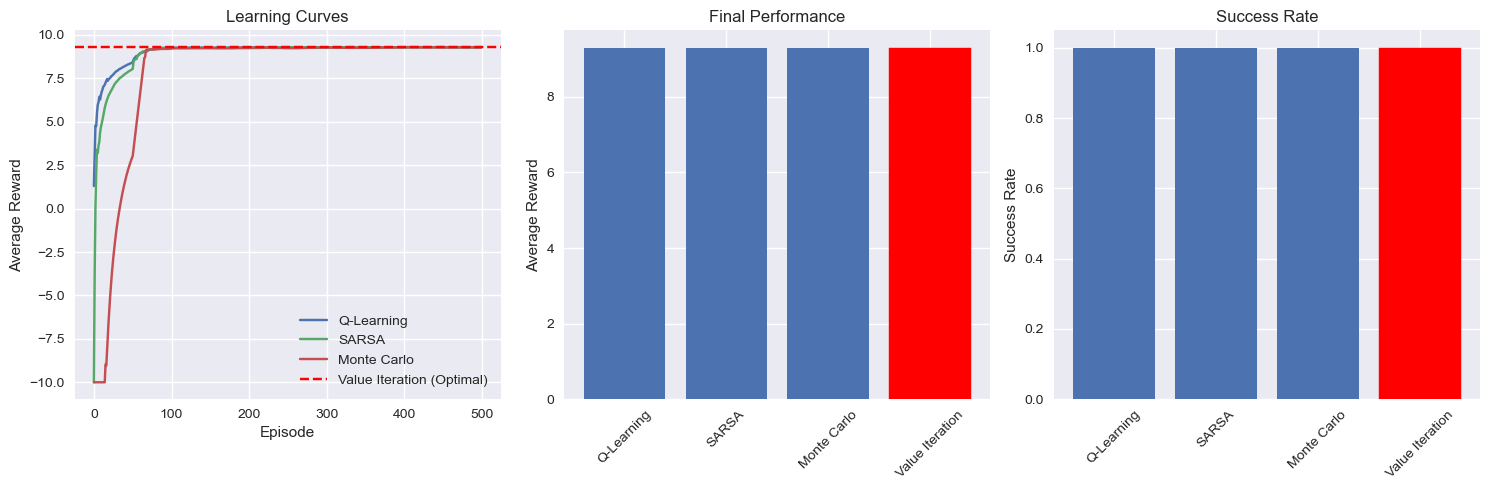

{'Q-Learning': {'final_avg_reward': 9.299999999999997,
  'success_rate': 1.0,
  'avg_steps_to_goal': 8.0},
 'SARSA': {'final_avg_reward': 9.299999999999997,
  'success_rate': 1.0,
  'avg_steps_to_goal': 8.0},
 'Monte Carlo': {'final_avg_reward': 9.299999999999997,
  'success_rate': 1.0,
  'avg_steps_to_goal': 8.0},
 'Value Iteration': {'final_avg_reward': 9.299999999999997,
  'success_rate': 1.0,
  'avg_steps_to_goal': 8.0}}

In [40]:
compare_algorithms_gridworld()


EXPERIMENT 2: Q-Learning vs SARSA on Cliff Walking

Training Q-Learning on Cliff Walking...
Episode 0, Average Reward: -695.00, Epsilon: 0.0995
Episode 100, Average Reward: -141.07, Epsilon: 0.06027415843082746
Episode 200, Average Reward: -47.39, Epsilon: 0.036512303261753636
Episode 300, Average Reward: -24.07, Epsilon: 0.02211807388415432
Episode 400, Average Reward: -16.81, Epsilon: 0.013398475271138355
Episode 500, Average Reward: -16.30, Epsilon: 0.01
Episode 600, Average Reward: -17.58, Epsilon: 0.01
Episode 700, Average Reward: -16.15, Epsilon: 0.01
Episode 800, Average Reward: -14.15, Epsilon: 0.01
Episode 900, Average Reward: -17.25, Epsilon: 0.01
Q-Learning Results: Final Avg Reward: -13.00, Success Rate: 100.0%, Avg Steps: 13.0

Training SARSA on Cliff Walking...
Episode 0, Average Reward: -893.00, Epsilon: 0.0995
Episode 100, Average Reward: -118.26, Epsilon: 0.06027415843082746
Episode 200, Average Reward: -37.32, Epsilon: 0.036512303261753636
Episode 300, Average Reward

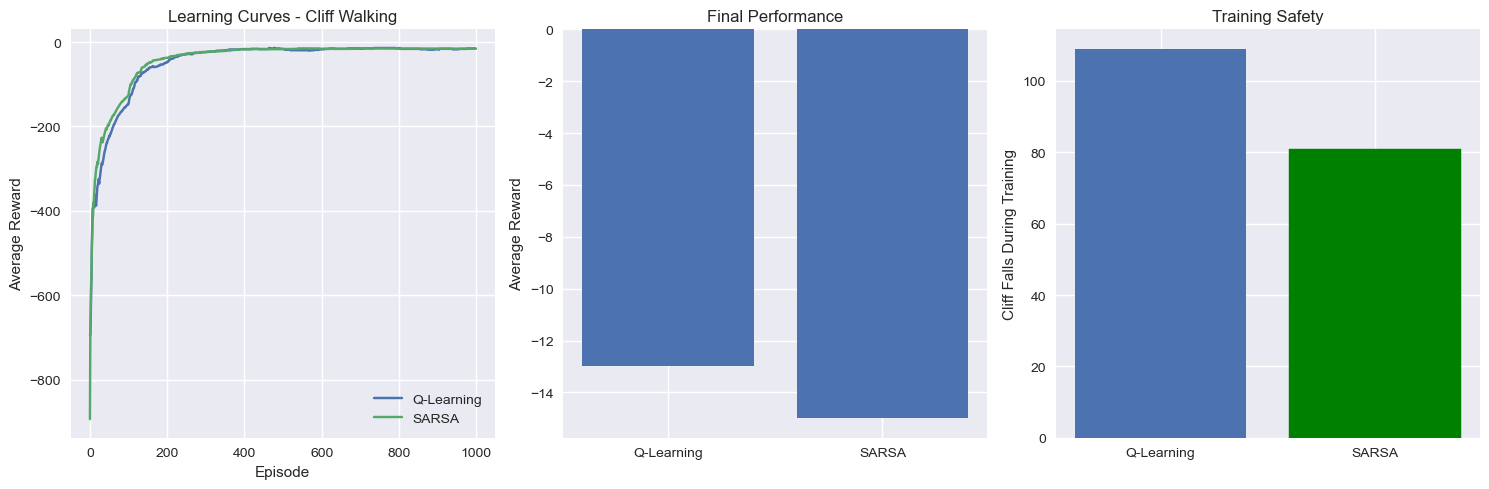


Cliff Falls During Training:
  Q-Learning: 109 falls
  SARSA: 81 falls

SARSA is safer during training (fewer cliff falls)
Q-Learning finds better final policy but takes more risks during learning


{'Q-Learning': {'final_avg_reward': -13.0,
  'success_rate': 1.0,
  'avg_steps_to_goal': 13.0,
  'cliff_falls': 109},
 'SARSA': {'final_avg_reward': -15.0,
  'success_rate': 1.0,
  'avg_steps_to_goal': 15.0,
  'cliff_falls': 81}}

In [42]:
compare_qlearning_vs_sarsa_cliff()


EXPERIMENT 3: Hyperparameter Sensitivity Analysis

Testing different learning rates...
Episode 0, Average Reward: -10.00, Epsilon: 0.0995
Episode 30, Average Reward: 5.88, Epsilon: 0.08560822709551225
Episode 60, Average Reward: 6.75, Epsilon: 0.07365596529082213
Episode 90, Average Reward: 7.20, Epsilon: 0.0633724281764409
Episode 120, Average Reward: 7.89, Epsilon: 0.05452463540625921
Episode 150, Average Reward: 8.30, Epsilon: 0.046912134373457745
Episode 180, Average Reward: 8.49, Epsilon: 0.0403624588239011
Episode 210, Average Reward: 8.68, Epsilon: 0.03472722151889233
Episode 240, Average Reward: 8.82, Epsilon: 0.029878752423974808
Episode 270, Average Reward: 8.94, Epsilon: 0.025707206259720835
Episode 0, Average Reward: 0.10, Epsilon: 0.0995
Episode 30, Average Reward: 7.81, Epsilon: 0.08560822709551225
Episode 60, Average Reward: 8.50, Epsilon: 0.07365596529082213
Episode 90, Average Reward: 8.74, Epsilon: 0.0633724281764409
Episode 120, Average Reward: 9.18, Epsilon: 0.0545

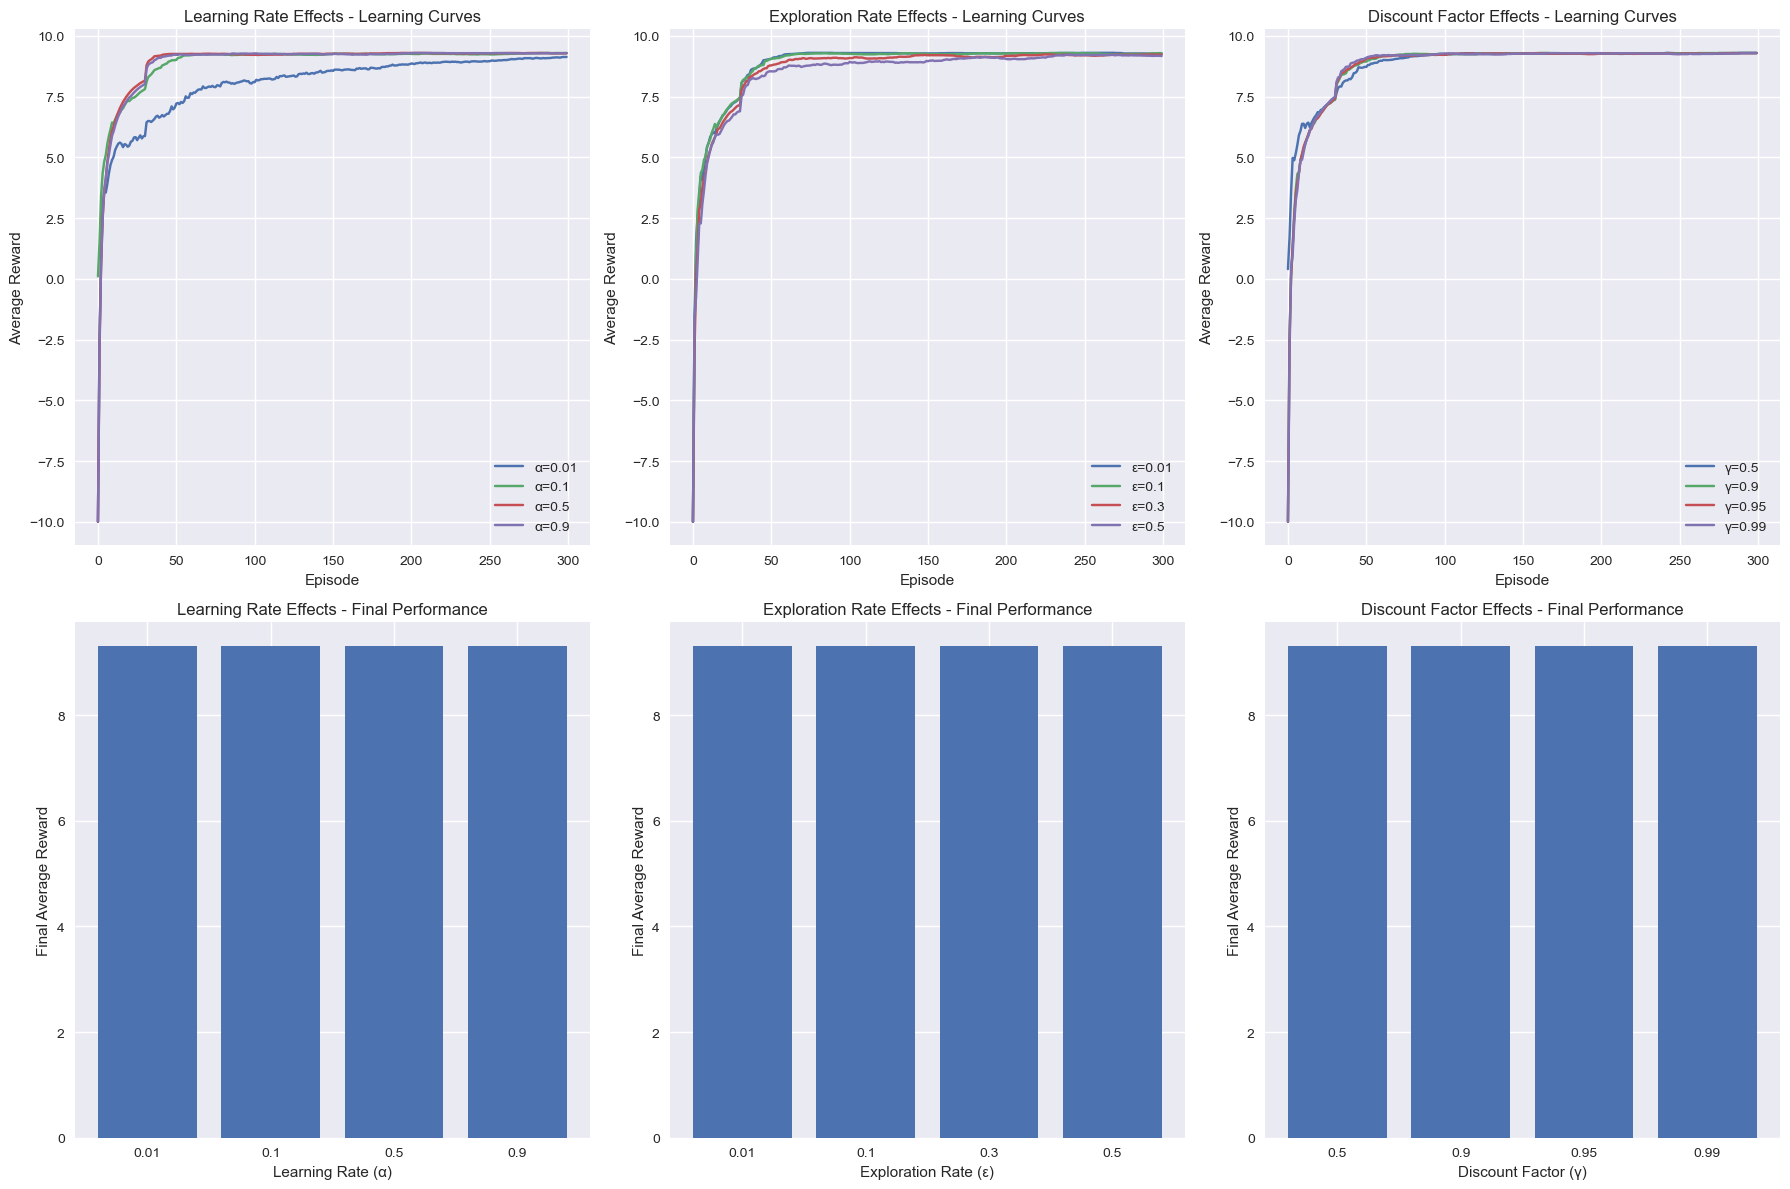


Best Hyperparameters: Learning Rate: 0.01 (9.30), Exploration Rate: 0.01 (9.30), Discount Factor: 0.5 (9.30)


{'learning_rates': {0.01: {'final_performance': 9.299999999999997,
   'success_rate': 1.0},
  0.1: {'final_performance': 9.299999999999997, 'success_rate': 1.0},
  0.5: {'final_performance': 9.299999999999997, 'success_rate': 1.0},
  0.9: {'final_performance': 9.299999999999997, 'success_rate': 1.0}},
 'exploration_rates': {0.01: {'final_performance': 9.299999999999997,
   'success_rate': 1.0},
  0.1: {'final_performance': 9.299999999999997, 'success_rate': 1.0},
  0.3: {'final_performance': 9.299999999999997, 'success_rate': 1.0},
  0.5: {'final_performance': 9.299999999999997, 'success_rate': 1.0}},
 'discount_factors': {0.5: {'final_performance': 9.299999999999997,
   'success_rate': 1.0},
  0.9: {'final_performance': 9.299999999999997, 'success_rate': 1.0},
  0.95: {'final_performance': 9.299999999999997, 'success_rate': 1.0},
  0.99: {'final_performance': 9.299999999999997, 'success_rate': 1.0}}}

In [44]:
analyze_hyperparameter_sensitivity()


EXPERIMENT 4: Convergence Analysis
Value iteration converged after 7 iterations

Analyzing convergence for Q-Learning...

Analyzing convergence for SARSA...

Analyzing convergence for Monte Carlo...


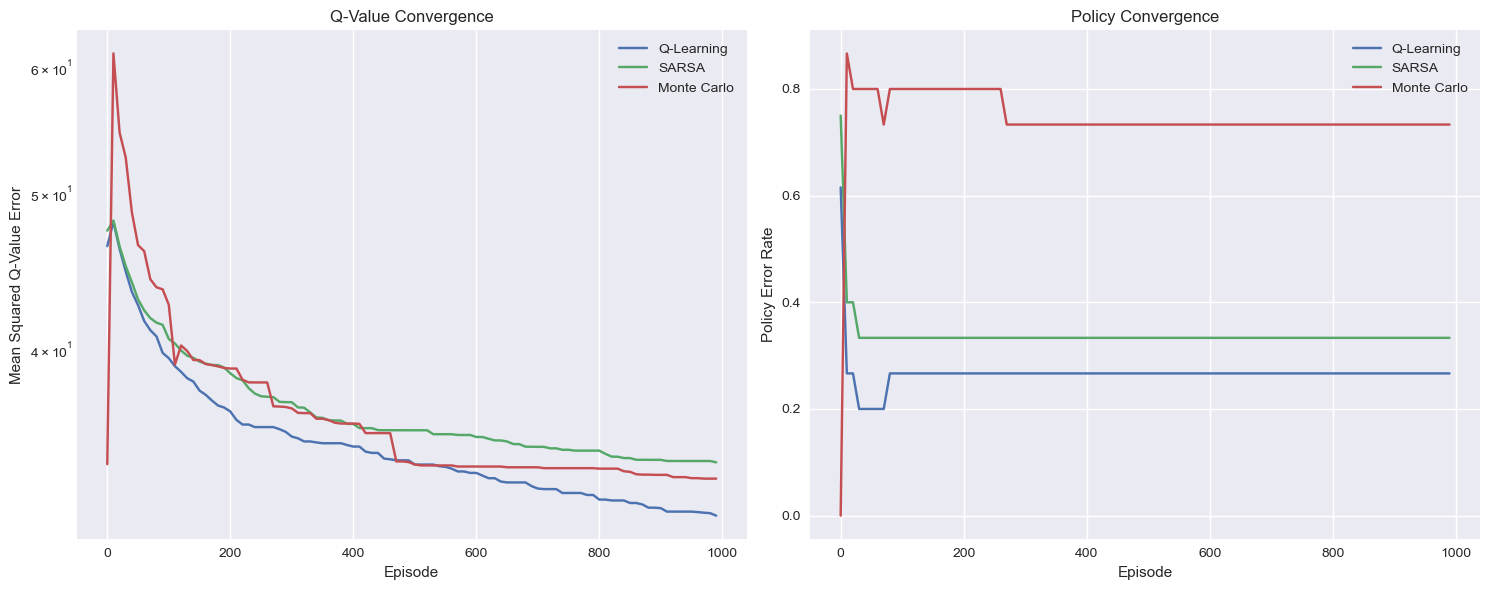


Final Convergence Metrics:
  Q-Learning: Final Q-Value Error: 31.485609, Final Policy Error Rate: 26.7%
  SARSA: Final Q-Value Error: 33.991248, Final Policy Error Rate: 33.3%
  Monte Carlo: Final Q-Value Error: 33.203138, Final Policy Error Rate: 73.3%


{'Q-Learning': {'q_errors': [46.36523913622355,
   48.017818589160456,
   46.181884094630604,
   44.70980018253555,
   43.41812098583882,
   42.59967809616896,
   41.63996056964003,
   41.091997675303205,
   40.72808994752001,
   39.77486210031815,
   39.47592053233503,
   39.02044936888717,
   38.70647012897904,
   38.351170076101525,
   38.169970067725835,
   37.677485742285945,
   37.44963911381599,
   37.149132206585485,
   36.88012303624971,
   36.771909795833366,
   36.56585618221353,
   36.12460833976783,
   35.88528963458218,
   35.8852896343994,
   35.75398984409199,
   35.75398984408437,
   35.7539898440829,
   35.753989844082625,
   35.64763701346264,
   35.51316473207886,
   35.26841076893432,
   35.18467745385715,
   35.024993071293466,
   35.024993071293466,
   34.97497223093828,
   34.93445535019235,
   34.93445535019235,
   34.93445535019235,
   34.93445535019235,
   34.84366876760347,
   34.767708630572926,
   34.767708630572926,
   34.5153810442318,
   34.452935659074

In [45]:
convergence_analysis()